<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/dc_neural_analysis_schooling_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for combining the 2p imaging and schooling stimuli/behavior done with the bonsai workflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#load packages
!pip install pynrrd
!pip install scikit-posthocs

import os
import csv
import numpy as np
import pandas as pd
import math
import time
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import nrrd
import scipy
from scipy import io
from scipy.fftpack import rfft, irfft, fftfreq
import scipy.stats as stats
import statsmodels
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans, AgglomerativeClustering
import random
from random import randrange
from random import shuffle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import scikit_posthocs as sp
%matplotlib inline
sns.set_style("white")



def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

def norm(inputs):
    output = (inputs-min(inputs))/(max(inputs)-min(inputs))
    return output

def baseline_subtraction(angle, window):
    new=[]
    for ndx,i in enumerate(angle):
        if ndx<window/2 or ndx>len(angle)-window/2:
            new.append(0)
        else:
            baseline=np.median(angle[ndx-int(window/2):ndx+int(window/2)])
            new.append(i-baseline)
    return new

def resized(data,N):
    old_indices = np.linspace(0, len(data) - 1, len(data))
    new_indices = np.linspace(0, len(data) - 1, N)
    res = np.interp(new_indices, old_indices, data)
    return res

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=3)
sns.set_style("white")

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Neural_activity/'

print('loaded')

print("S1 = horizontal object stimulus")
print("S2 = vertical object stimulus")
print("S3 = circle object stimulus")
print("S4 = floor drift stimulus")

Mounted at /content/drive/
loaded
S1 = horizontal object stimulus
S2 = vertical object stimulus
S3 = circle object stimulus
S4 = floor drift stimulus


////////////
running subject #  DZ-230518_wk2_f1_z-130_schooling
////////////
STEP1: load data and plot
67149


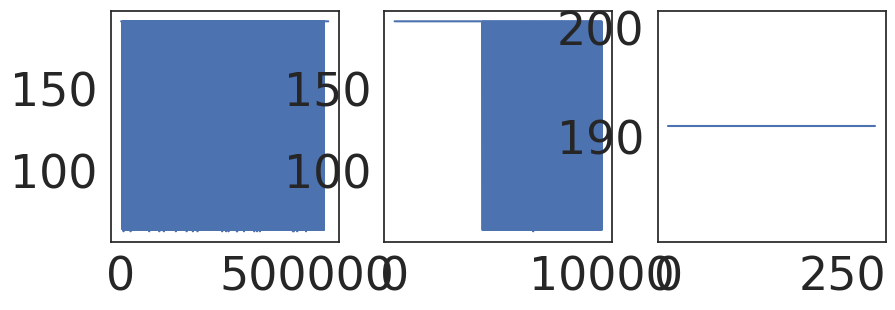

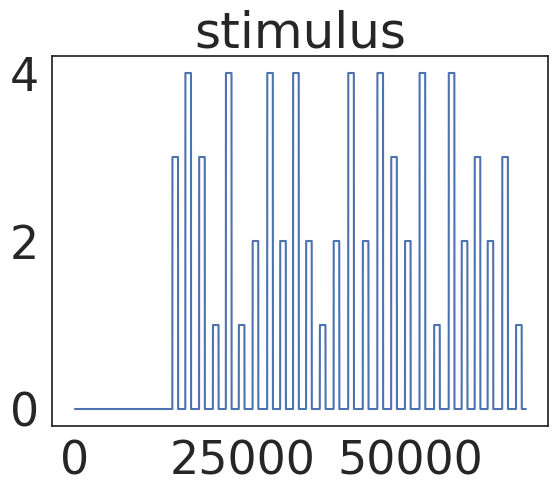

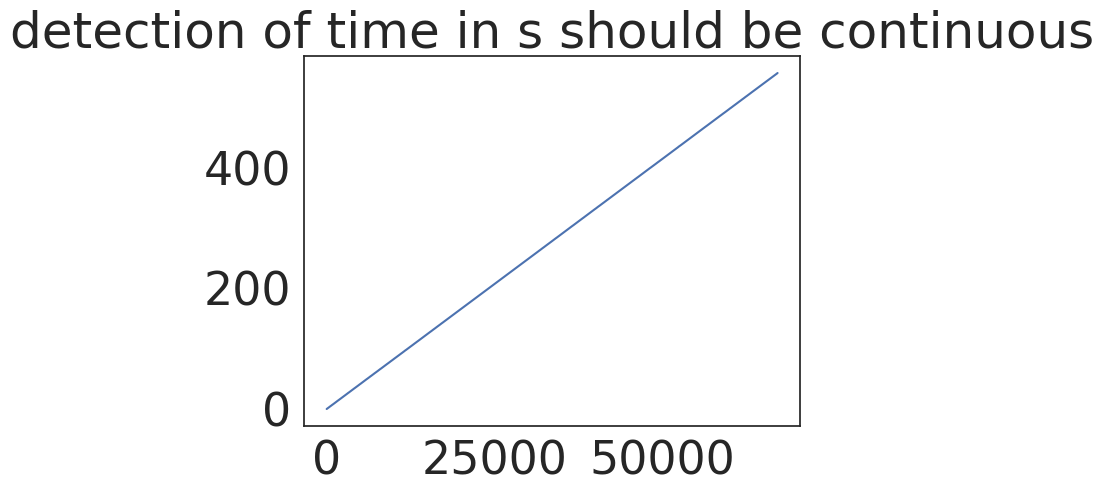

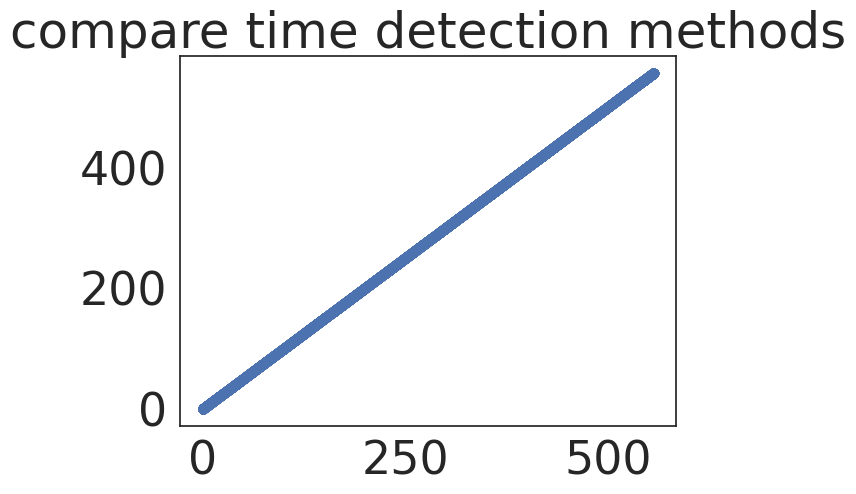

Starting file: date =  2023-05-18  time =  9 : 40 : 33.8622  framerate is 120.70784204599933
all should be equal  67149 67149 67149
4221 544703
STEP2: get movement details
bts= 65225 1144 65255


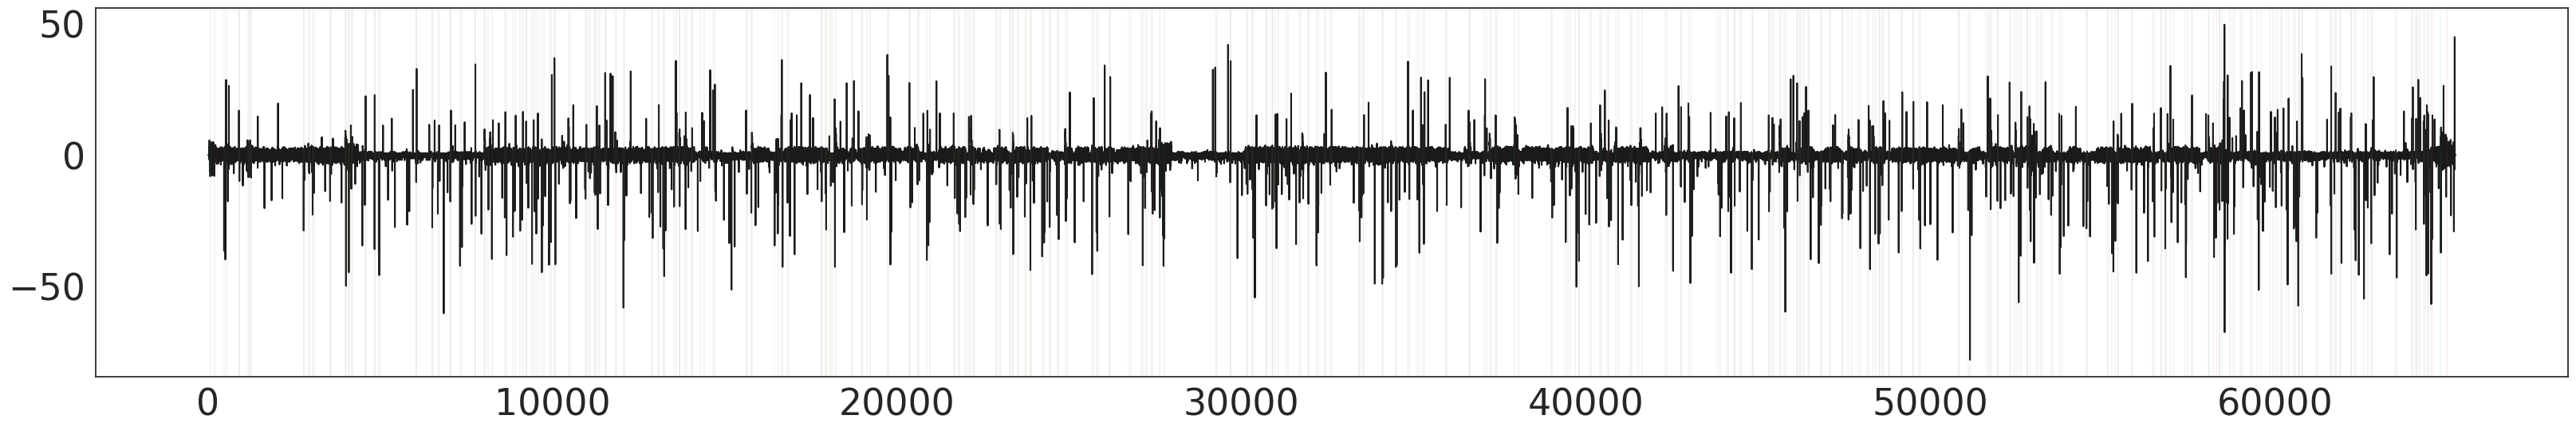

65255 65255
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230518_wk2_f1_z-130_schooling/frames.bin'>
////////////
running subject #  DZ-230605-f3-100_2wk_schooling
////////////
STEP1: load data and plot
68760


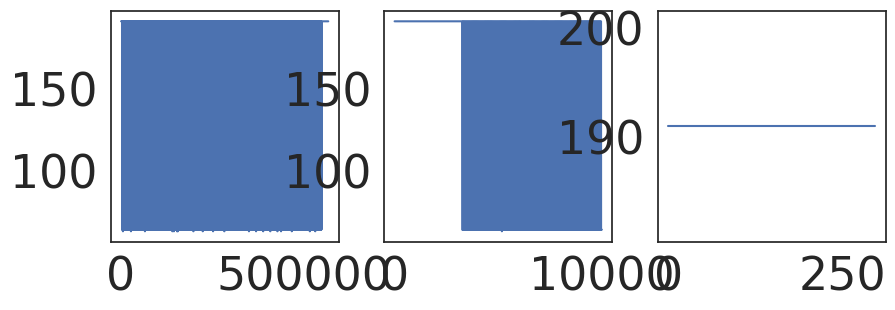

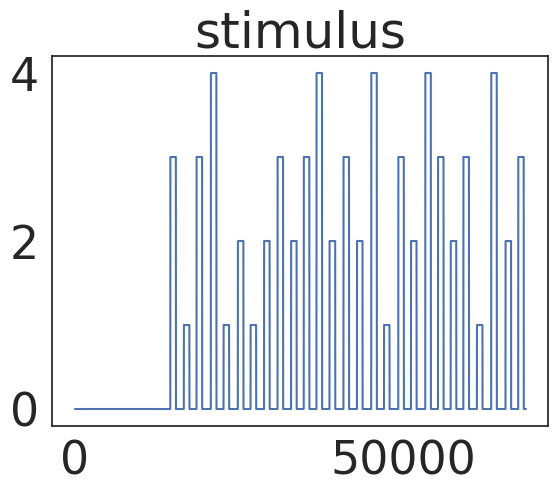

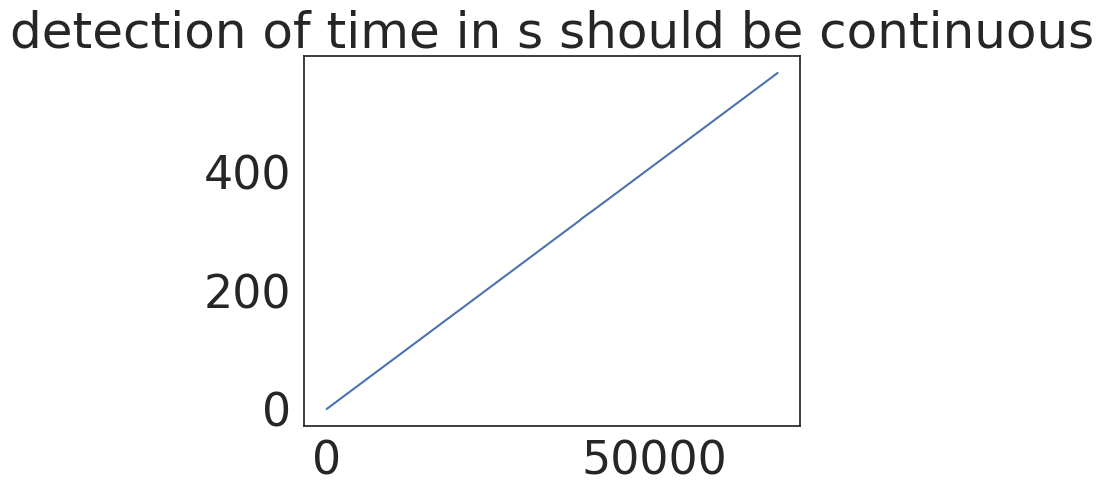

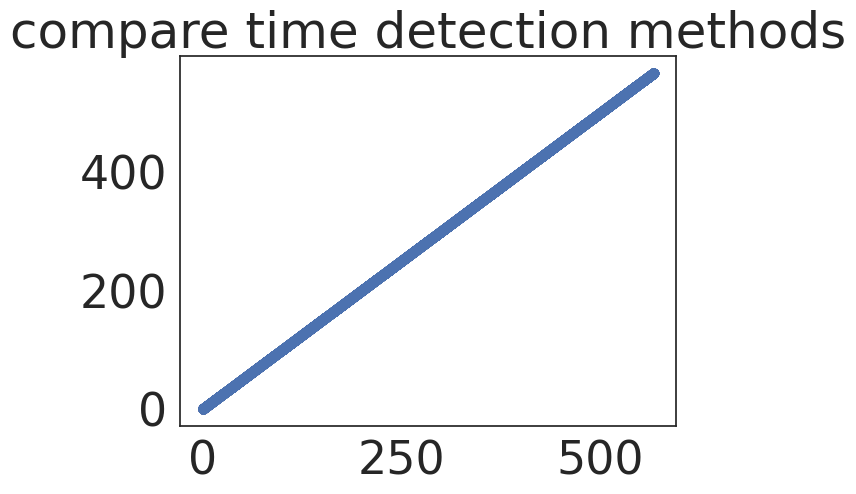

Starting file: date =  2023-06-05  time =  14 : 13 : 40.8494  framerate is 121.12039536402705
all should be equal  68760 68760 68760
3257 549123
STEP2: get movement details
bts= 63795 1297 66125


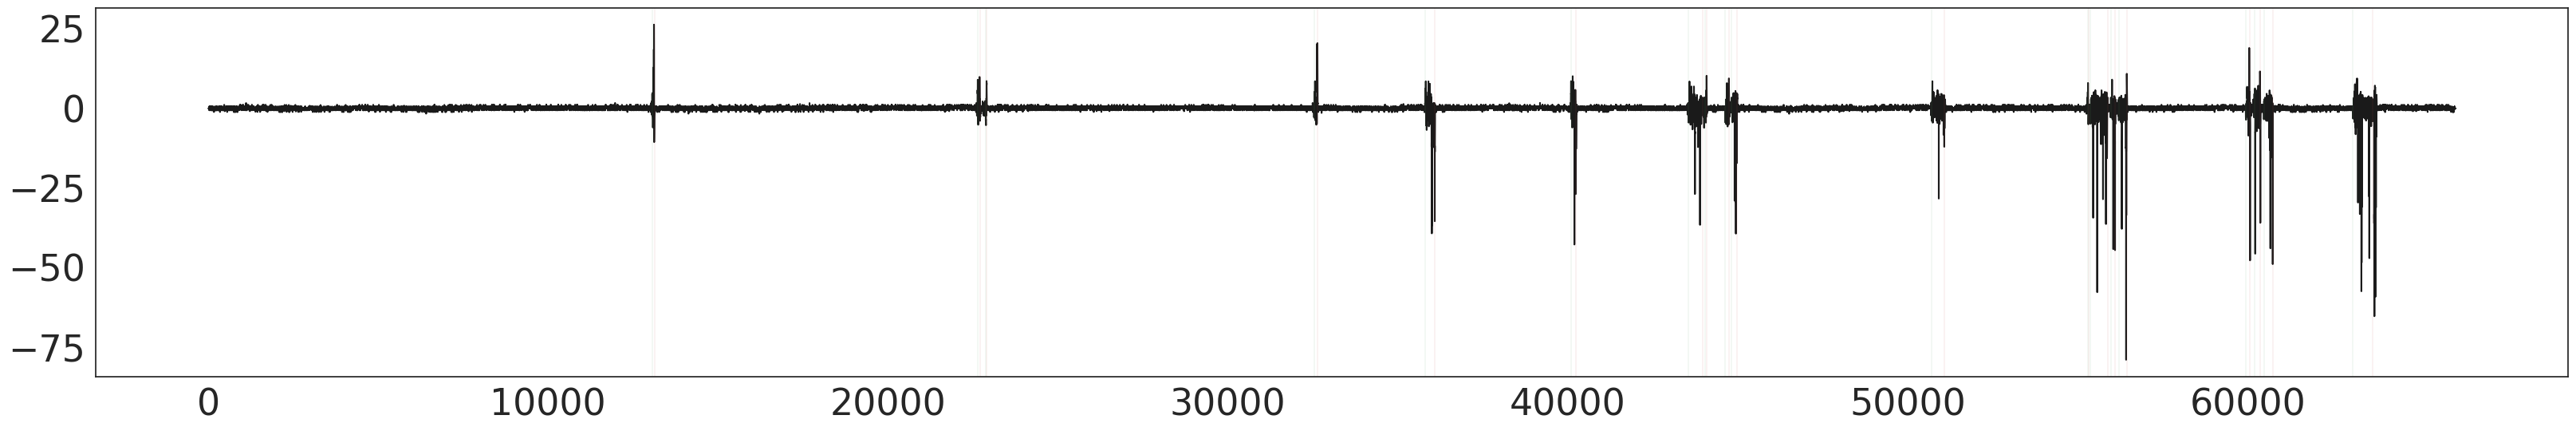

66125 66125
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230605-f3-100_2wk_schooling/frames.bin'>
////////////
running subject #  DZ-230605-f5-90_2wk_schooling
////////////
STEP1: load data and plot
80091


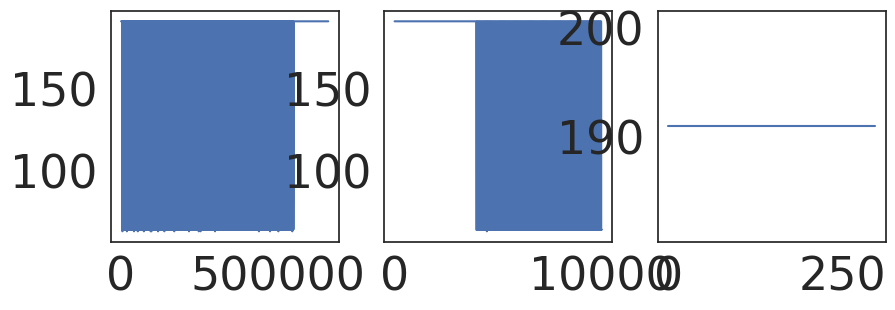

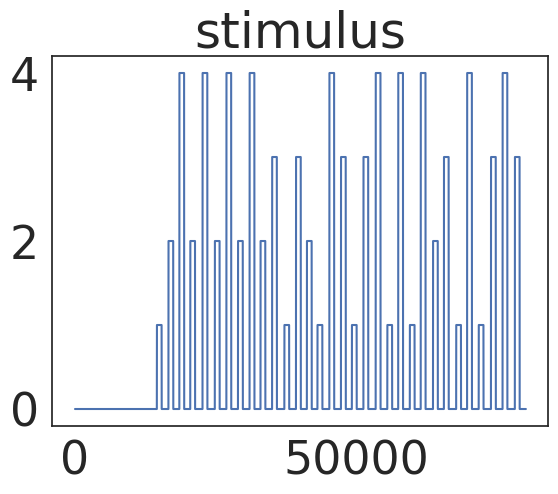

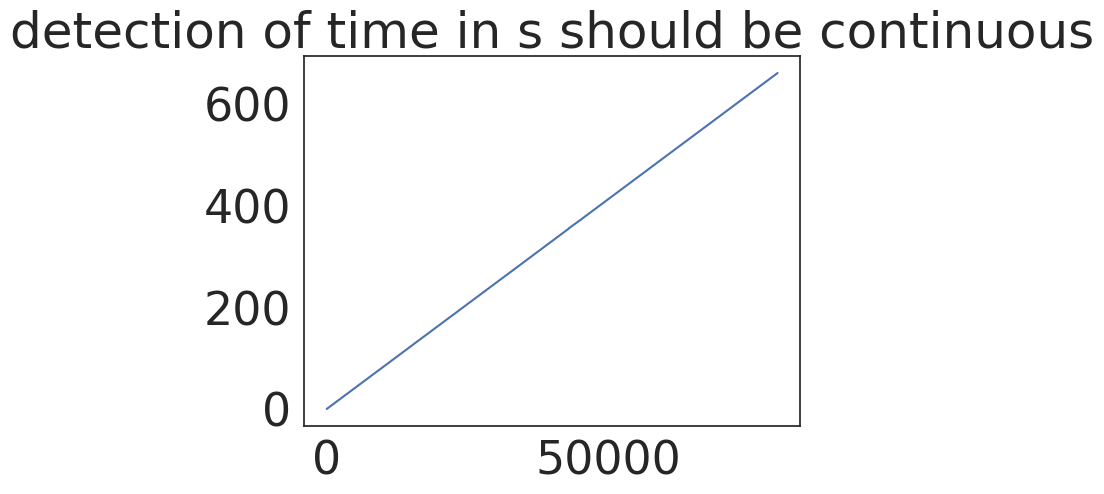

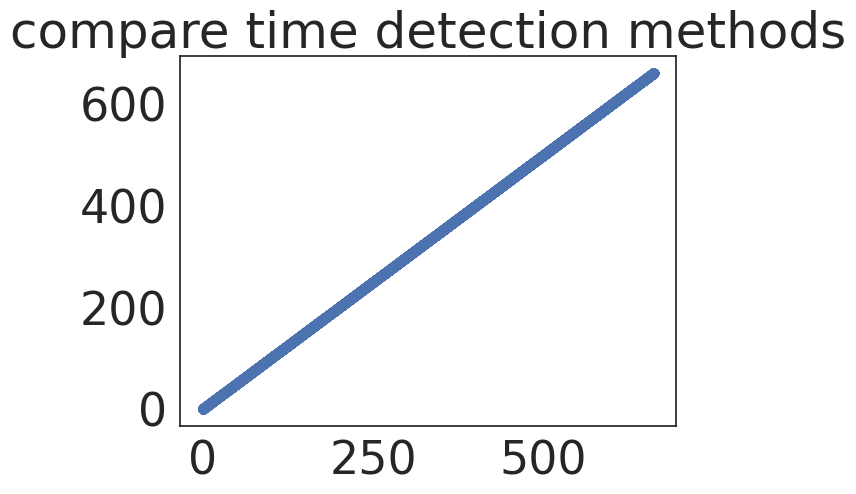

Starting file: date =  2023-06-05  time =  14 : 58 : 6.2478  framerate is 121.12366391710765
all should be equal  80091 80091 80091
3935 549825
STEP2: get movement details
bts= 65991 2246 66132


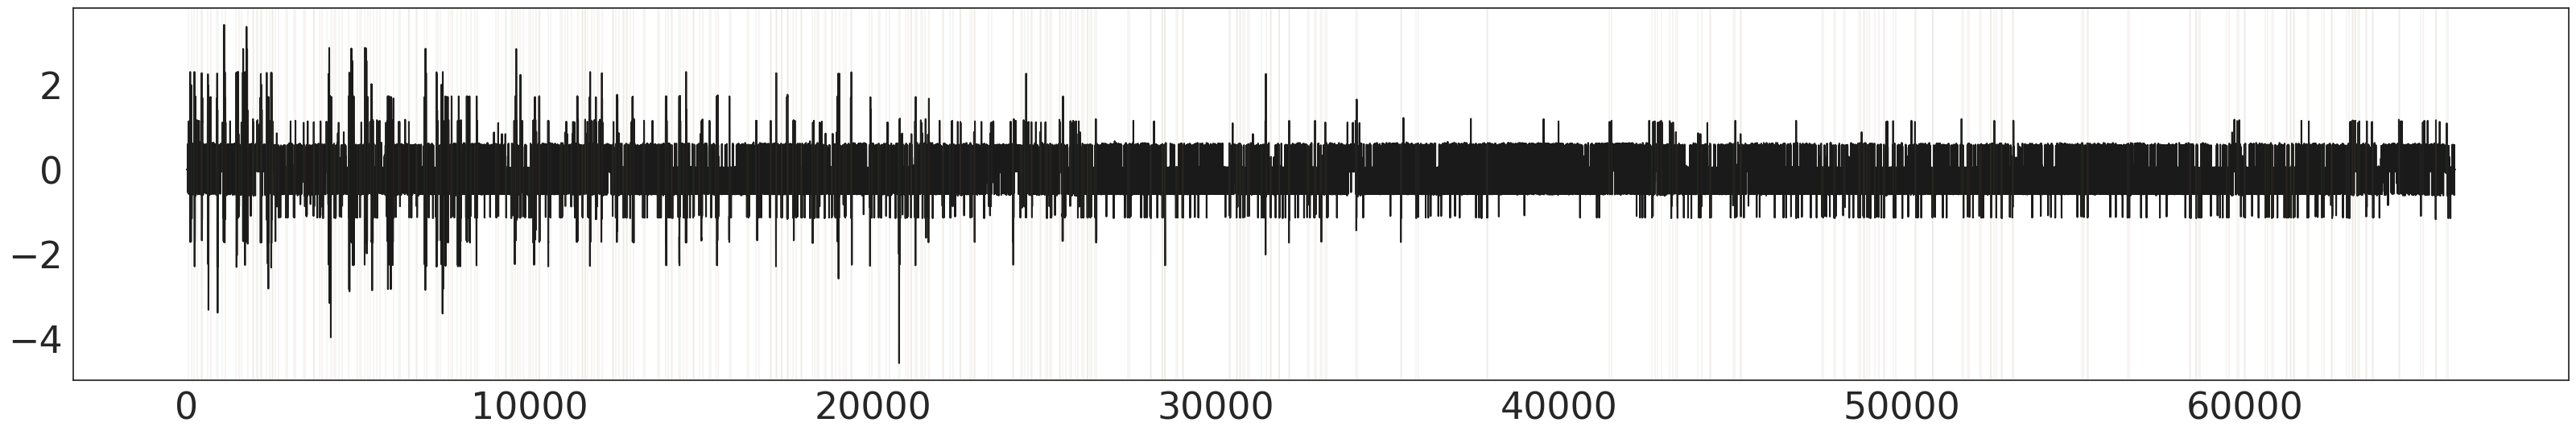

66132 66132
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230605-f5-90_2wk_schooling/frames.bin'>
////////////
running subject #  ml-230427-f4_schooling-3
////////////
STEP1: load data and plot
64622


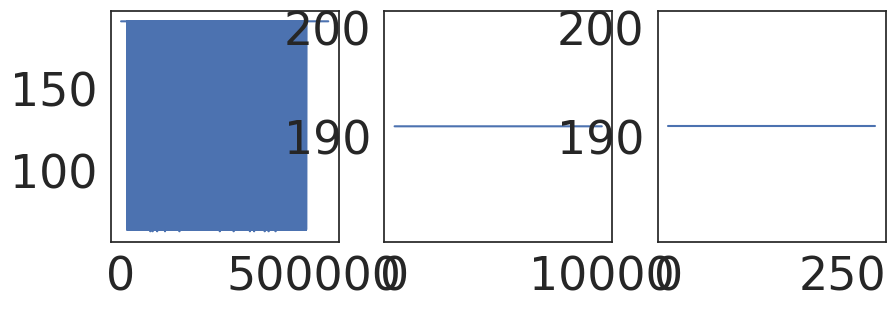

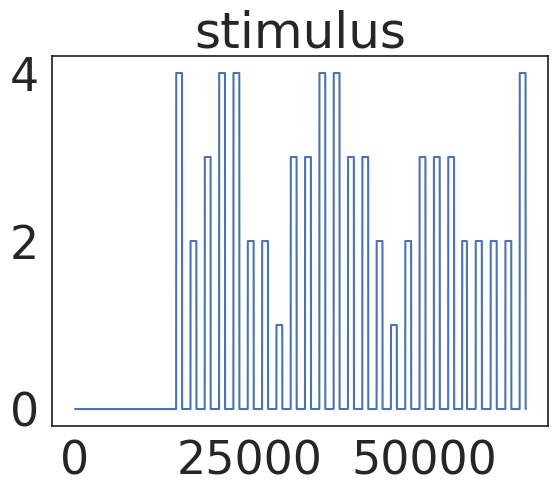

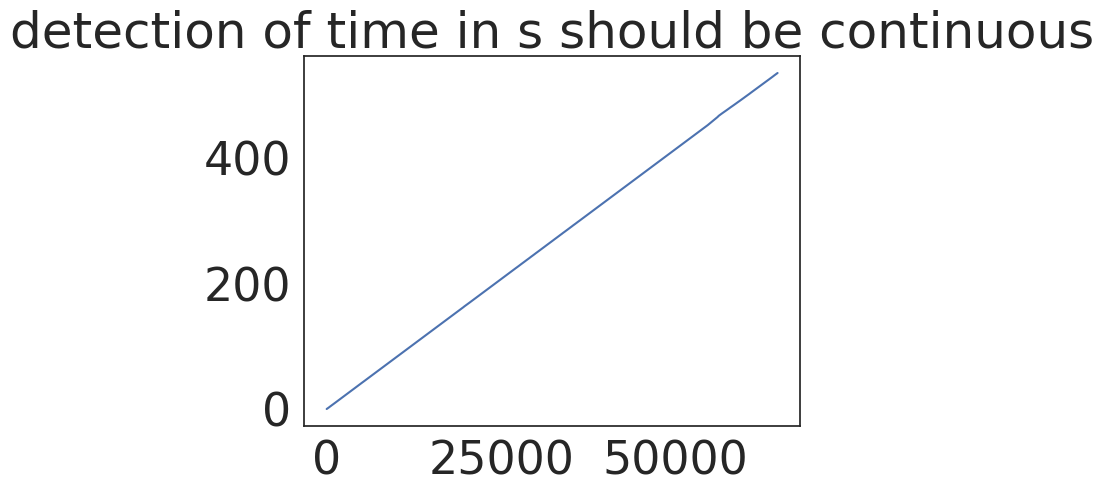

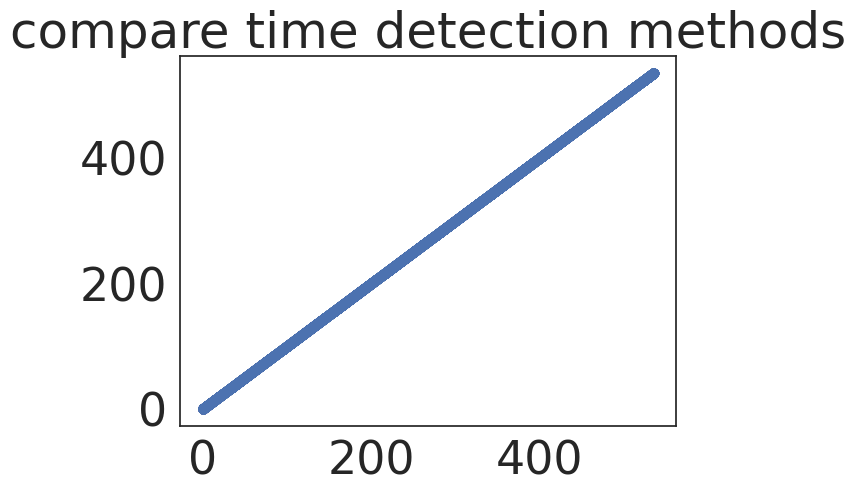

Starting file: date =  2023-04-17  time =  17 : 57 : 35.939  framerate is 120.70483314315396
all should be equal  64622 64622 64622
15782 478976
STEP2: get movement details
bts= 55722 1779 55763


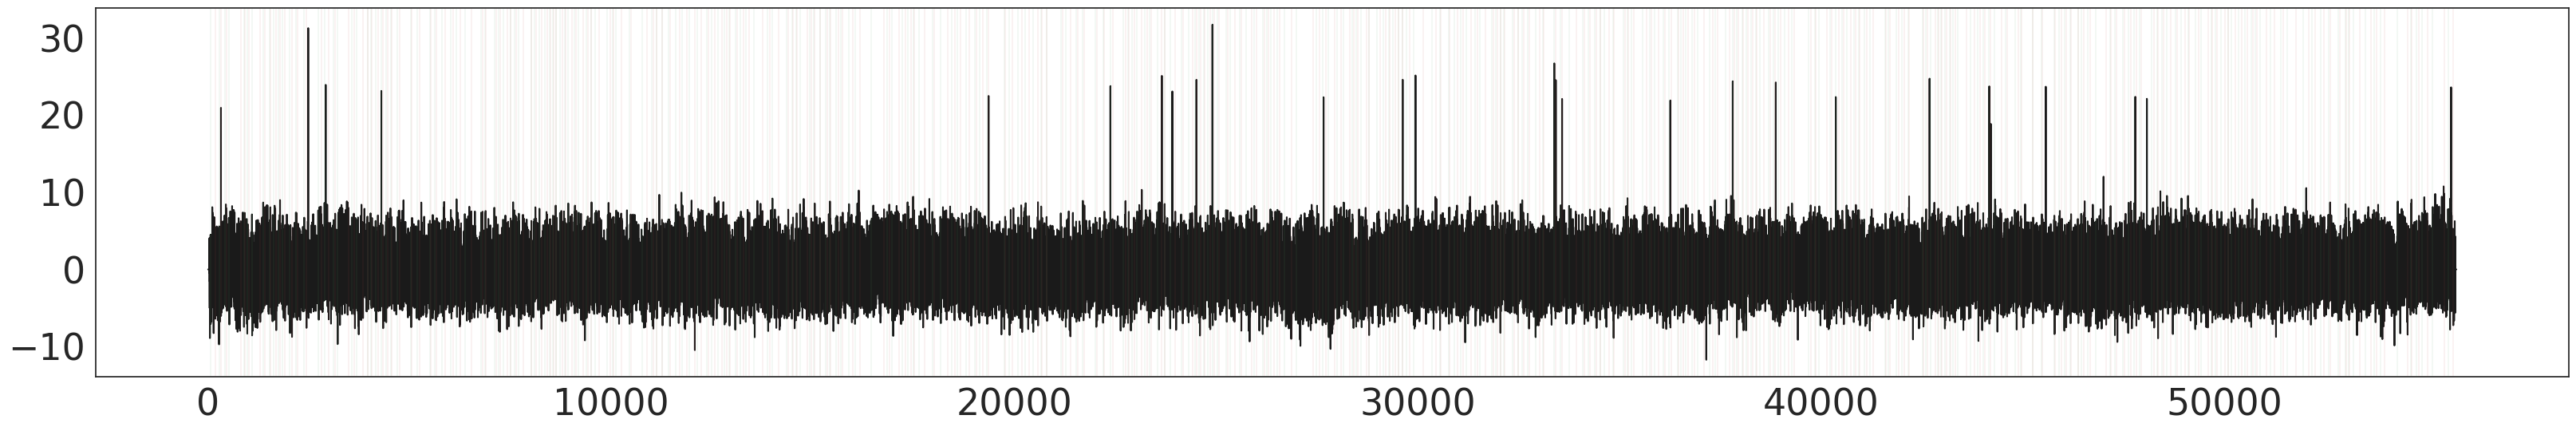

55763 55763
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/ml-230427-f4_schooling-3/frames.bin'>
////////////
running subject #  DZ-230517_wk2_f2-2_schooling
////////////
STEP1: load data and plot
66075


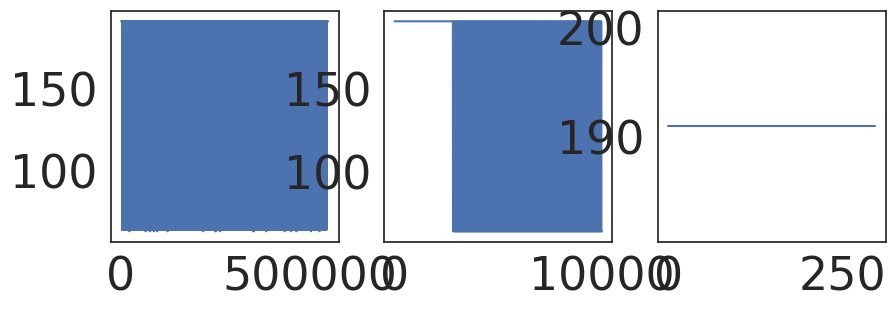

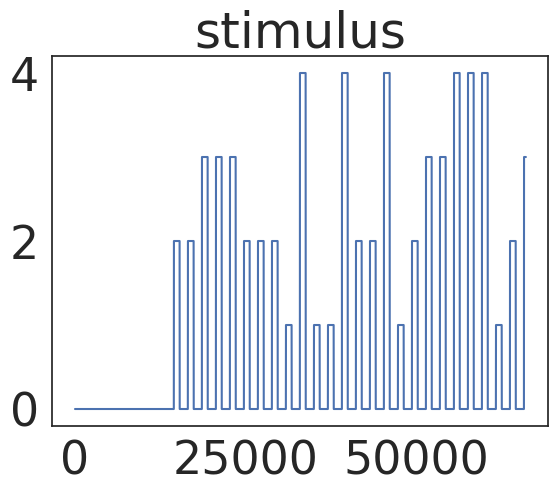

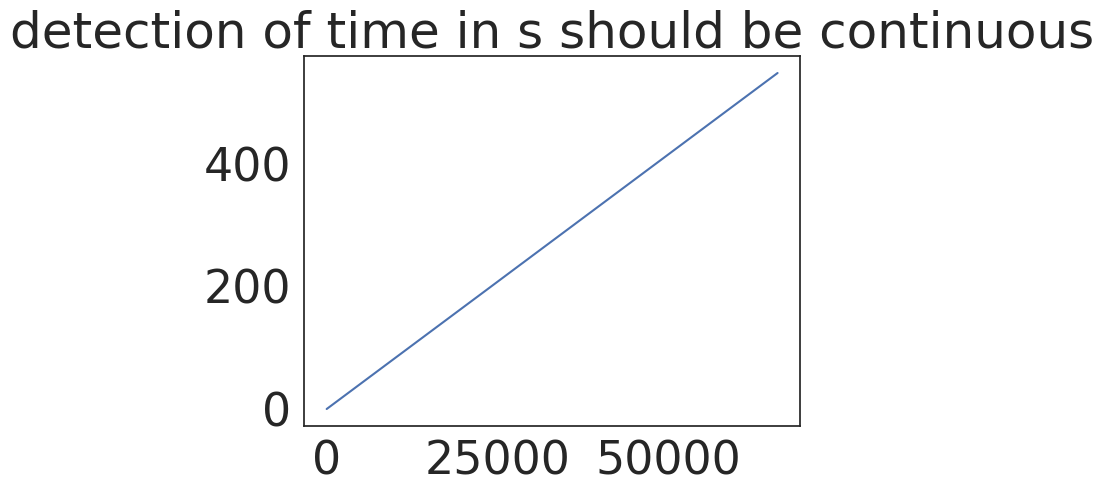

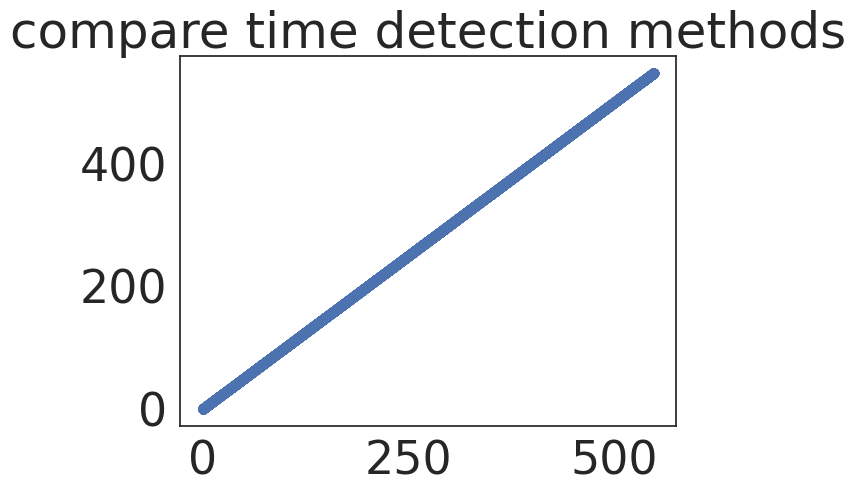

Starting file: date =  2023-05-17  time =  11 : 36 : 4.6064  framerate is 120.71059491004092
all should be equal  66075 66075 66075
2814 543349
STEP2: get movement details
bts= 64129 1464 65254


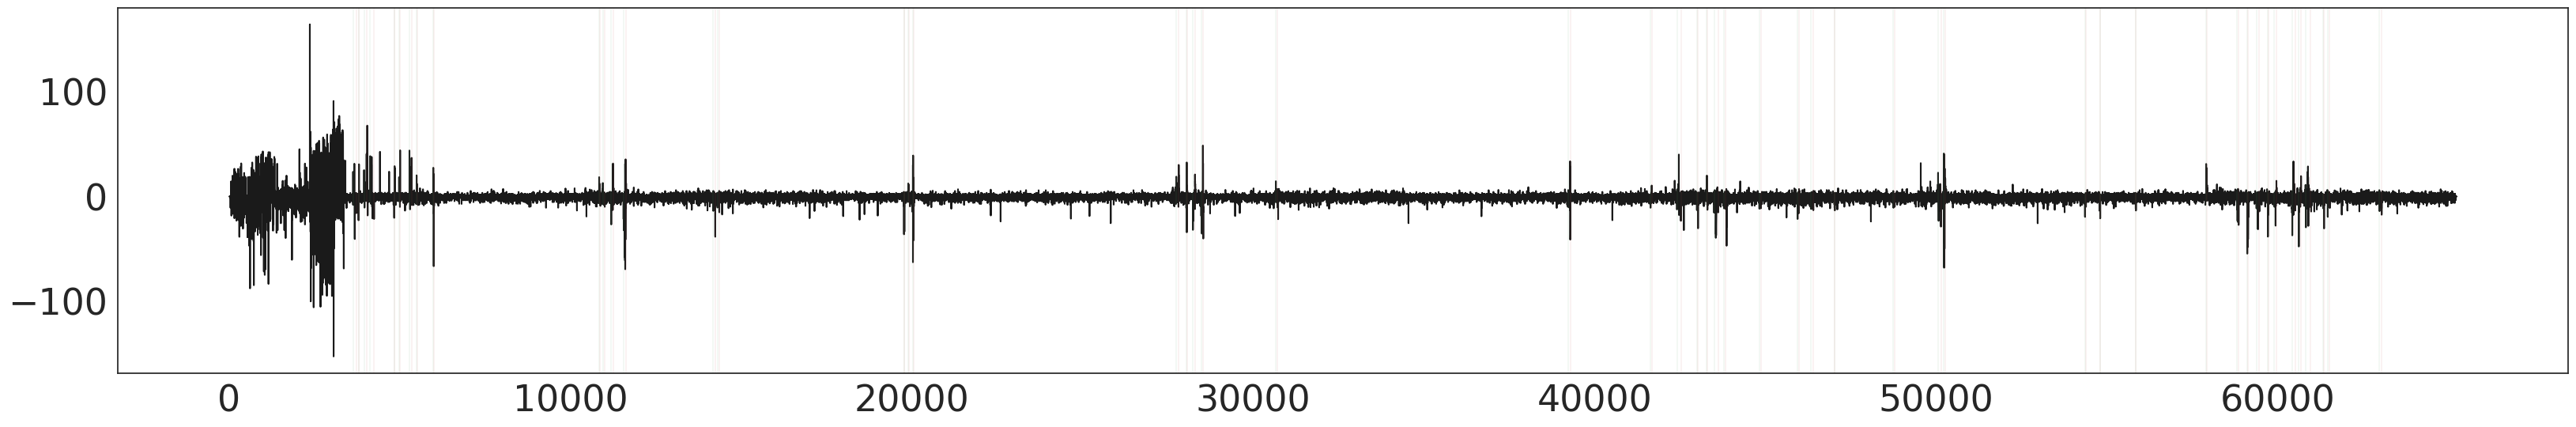

65254 65254
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230517_wk2_f2-2_schooling/frames.bin'>
////////////
running subject #  DZ-230518_wk2_f2-170_schooling
////////////
STEP1: load data and plot
70128


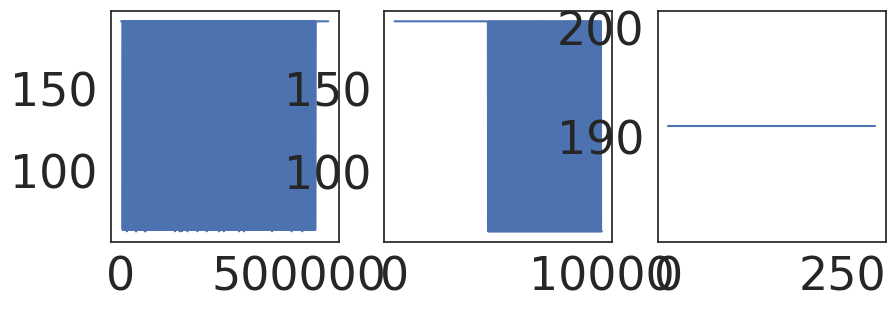

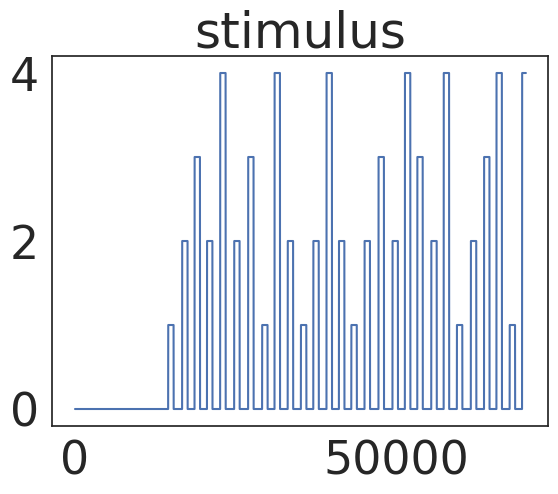

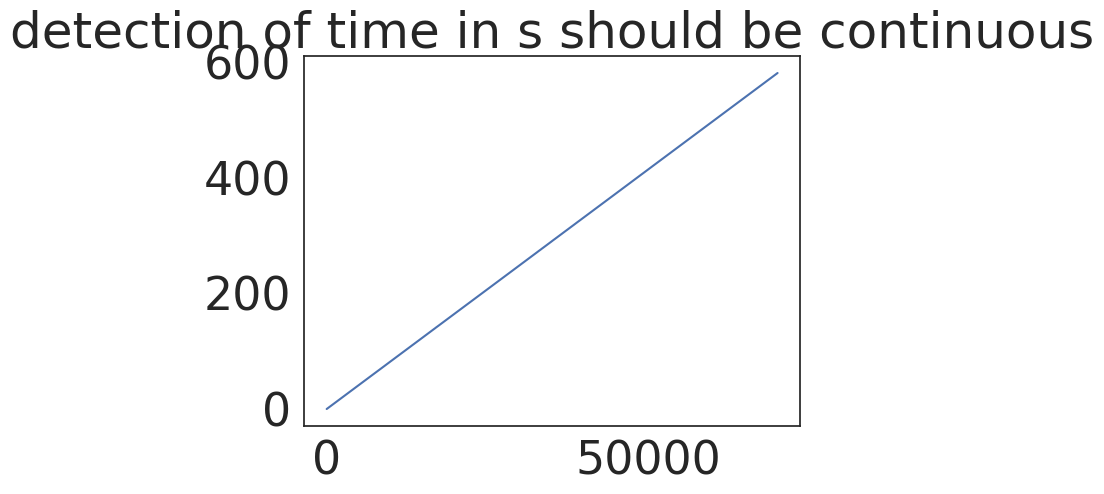

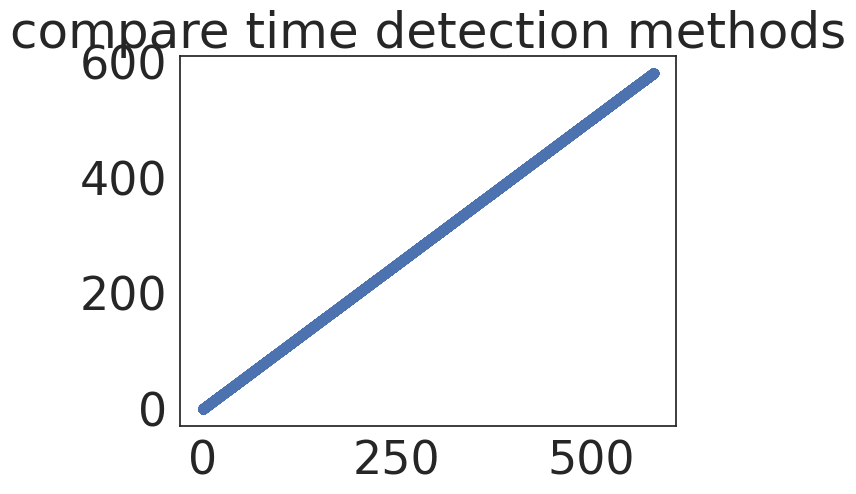

Starting file: date =  2023-05-18  time =  10 : 14 : 7.7253  framerate is 120.71252197906728
all should be equal  70128 70128 70128
4505 544984
STEP2: get movement details
bts= 65067 1190 65250


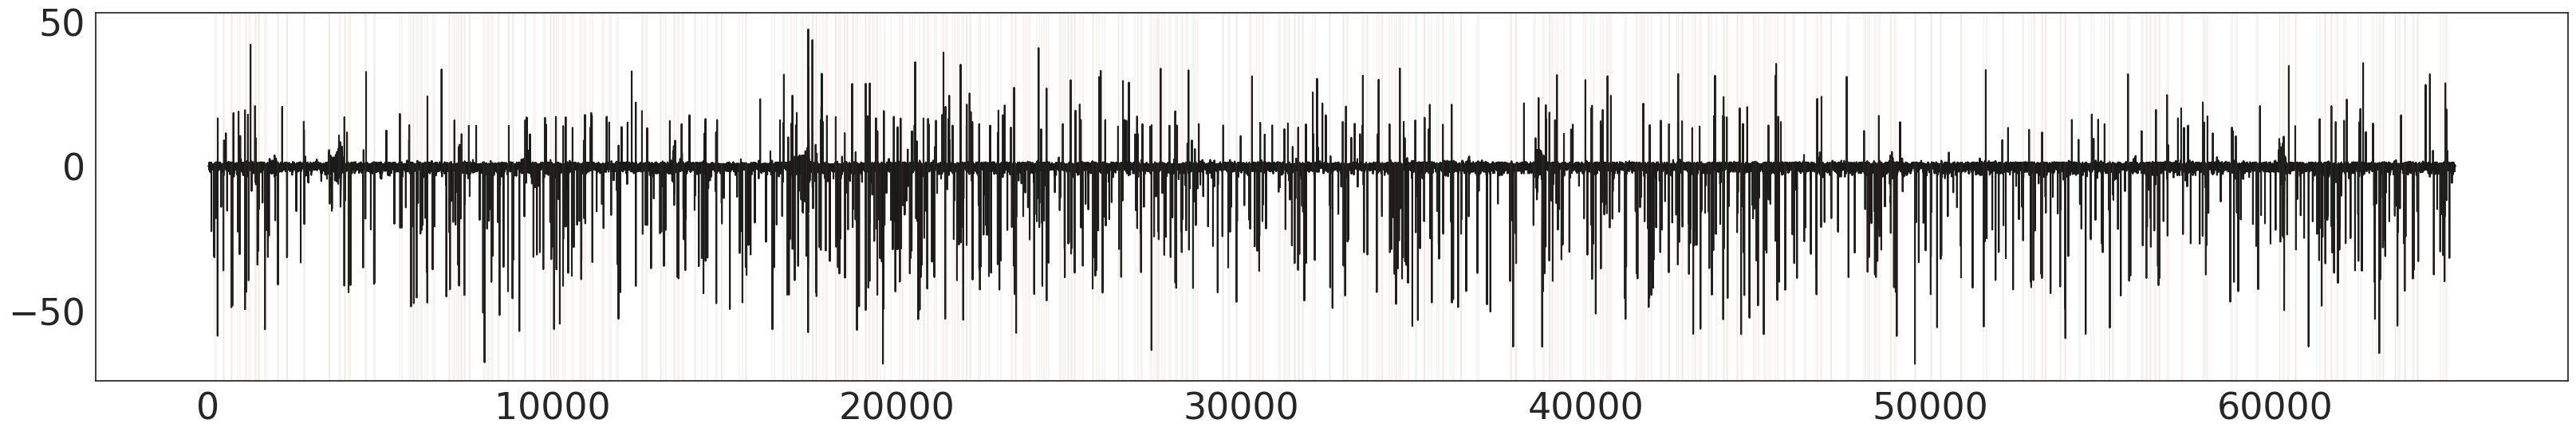

65250 65250
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230518_wk2_f2-170_schooling/frames.bin'>
////////////
running subject #  DZ-230503_wk4_f1_schooling
////////////
STEP1: load data and plot
66562


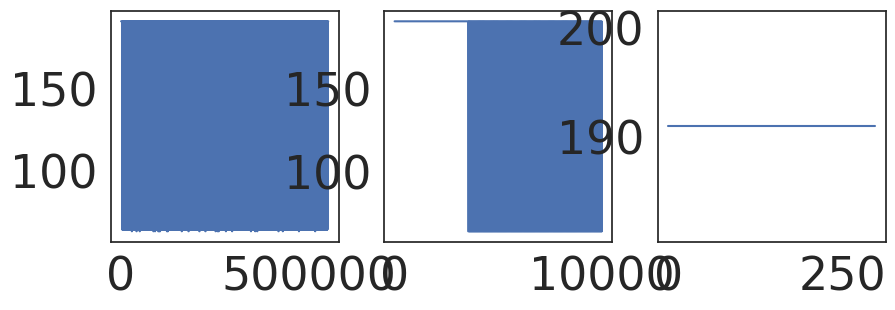

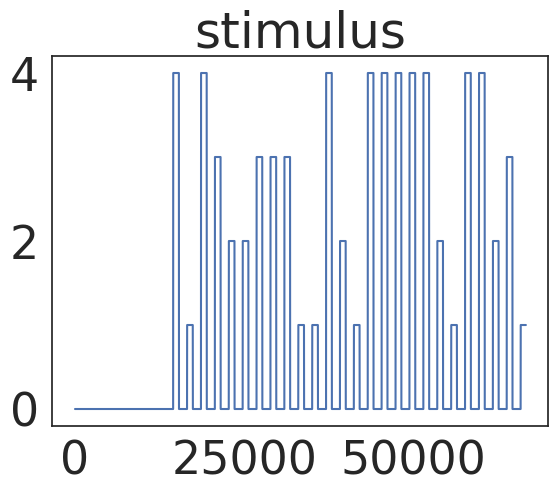

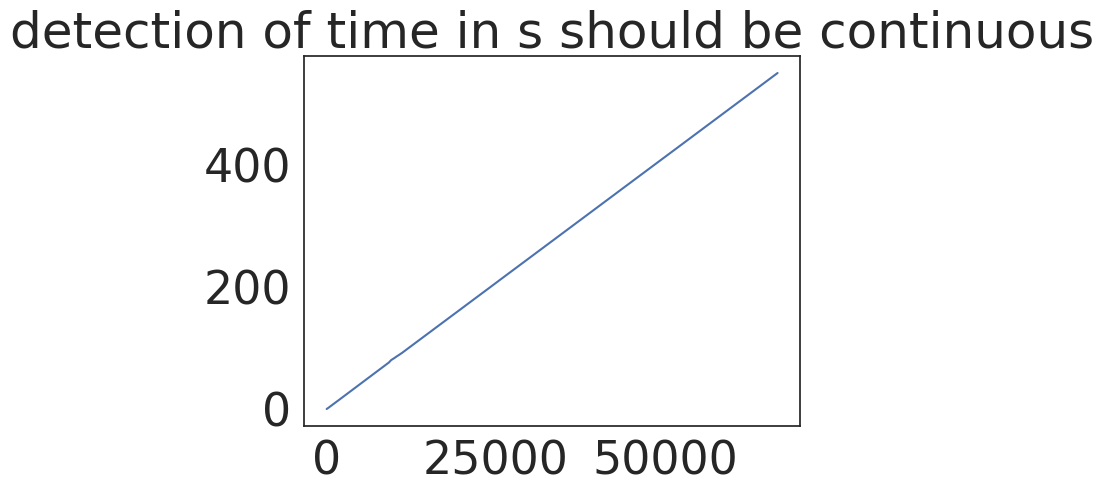

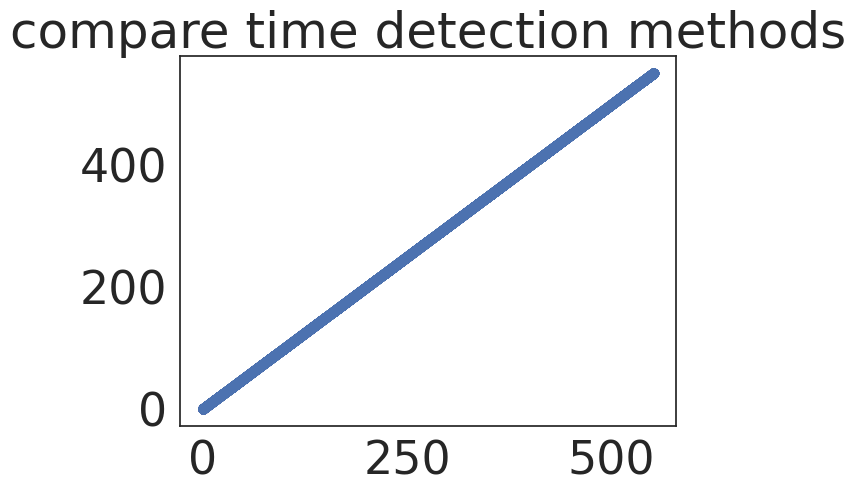

Starting file: date =  2023-05-03  time =  9 : 34 : 21.7784  framerate is 120.7084152418811
all should be equal  66562 66562 66562
3546 549432
STEP2: get movement details
bts= 65233 956 65884


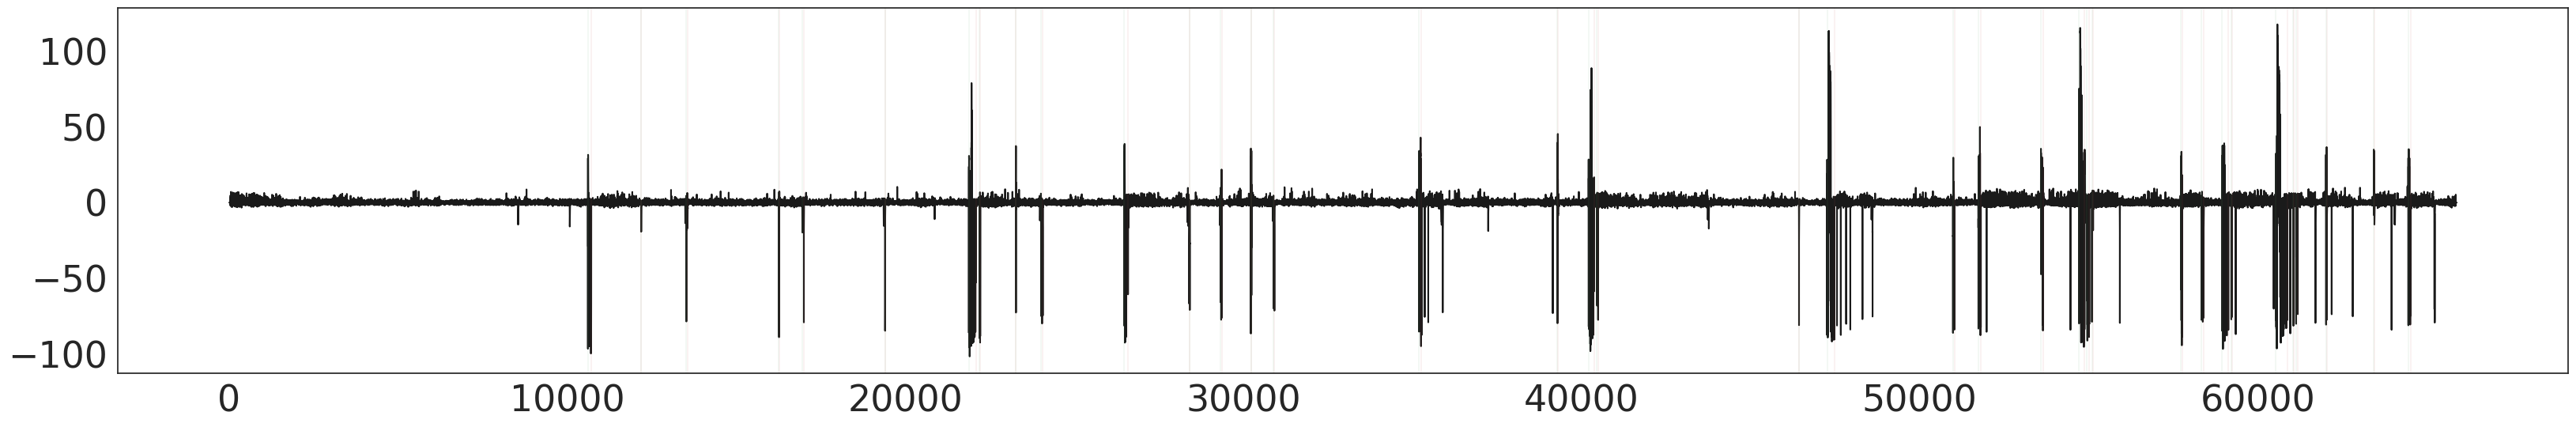

65884 65884
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230503_wk4_f1_schooling/frames.bin'>
////////////
running subject #  DZ-230519_wk4_f1-2_schooling
////////////
STEP1: load data and plot
67064


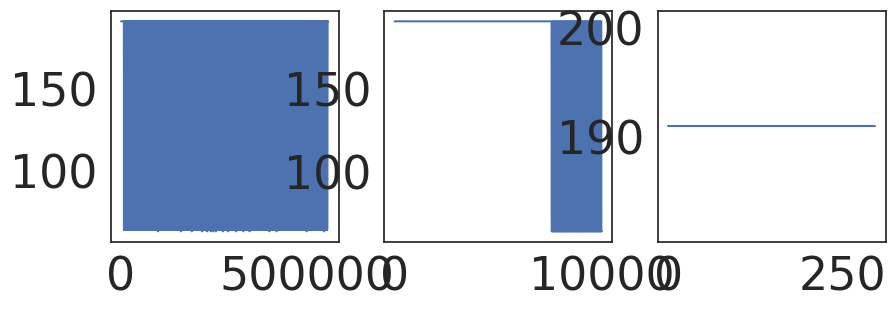

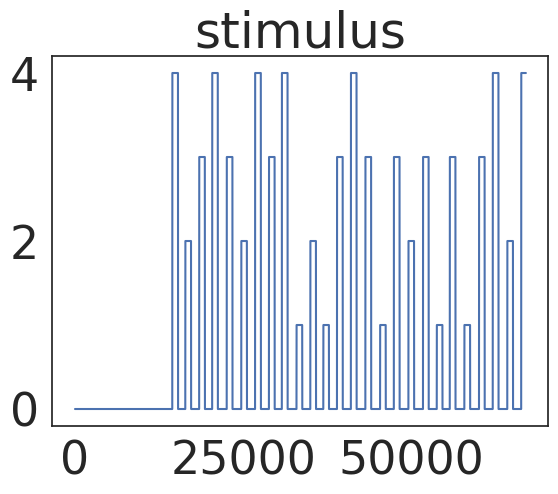

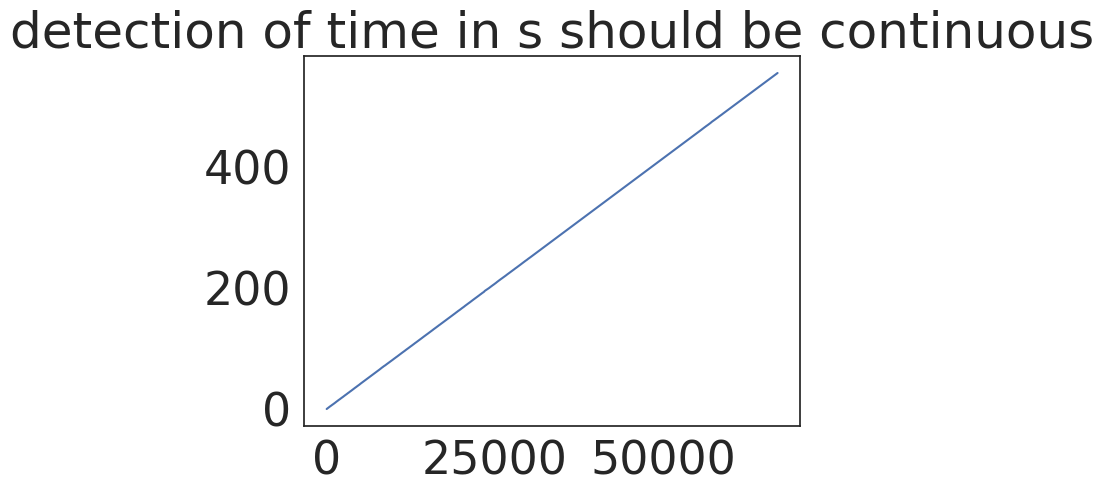

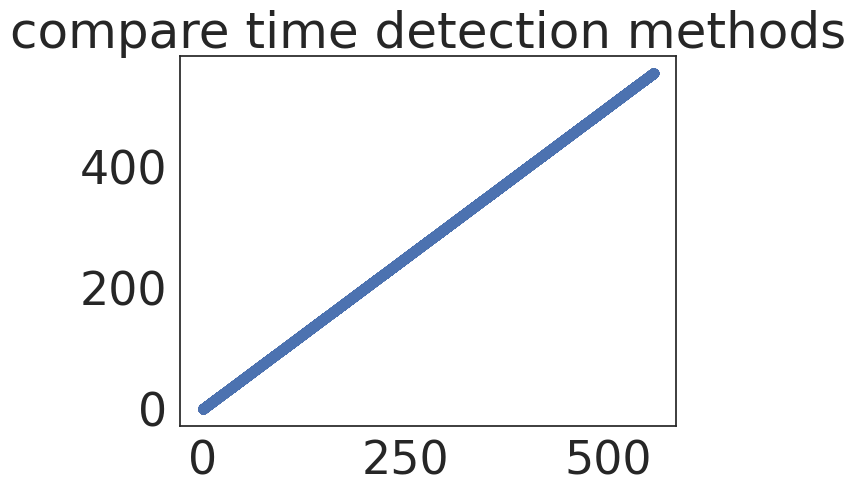

Starting file: date =  2023-05-19  time =  10 : 17 : 14.9408  framerate is 120.66918642583117
all should be equal  67064 67064 67064
7577 553446
STEP2: get movement details
bts= 63264 512 65882


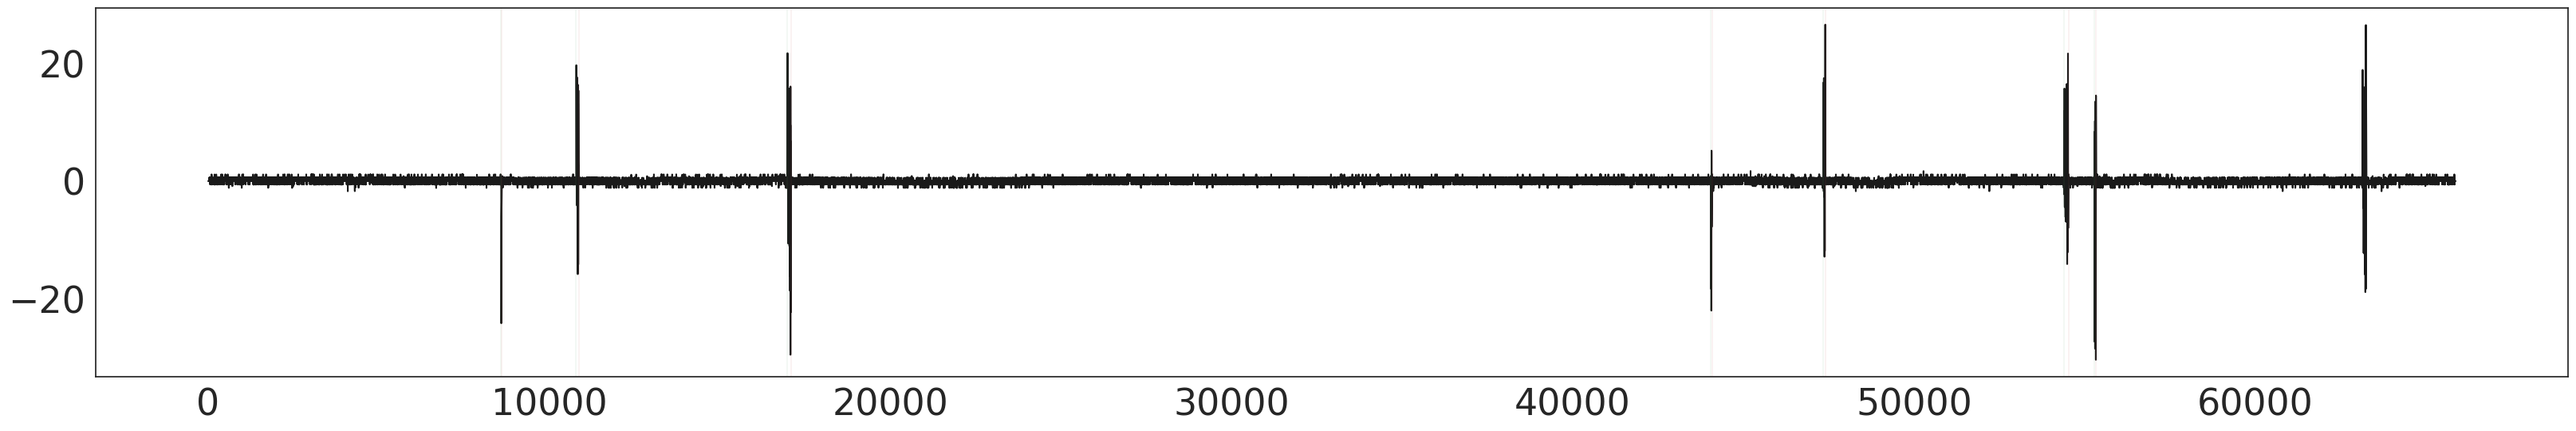

65882 65882
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230519_wk4_f1-2_schooling/frames.bin'>
////////////
running subject #  DZ-230523_wk4_f2_-140_schooling
////////////
STEP1: load data and plot
67648


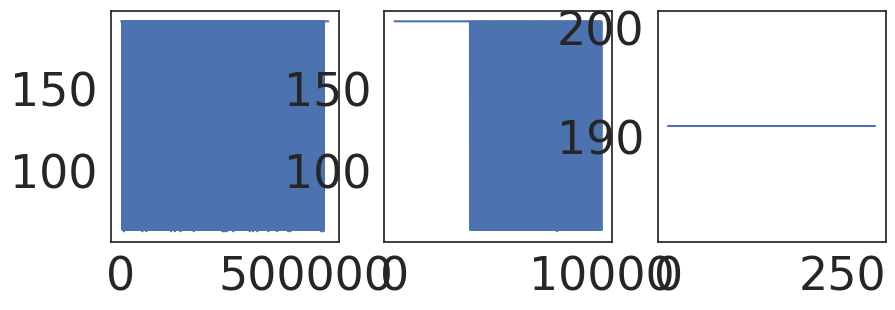

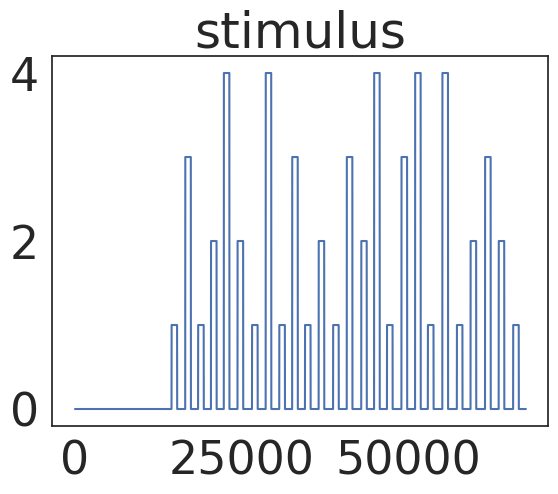

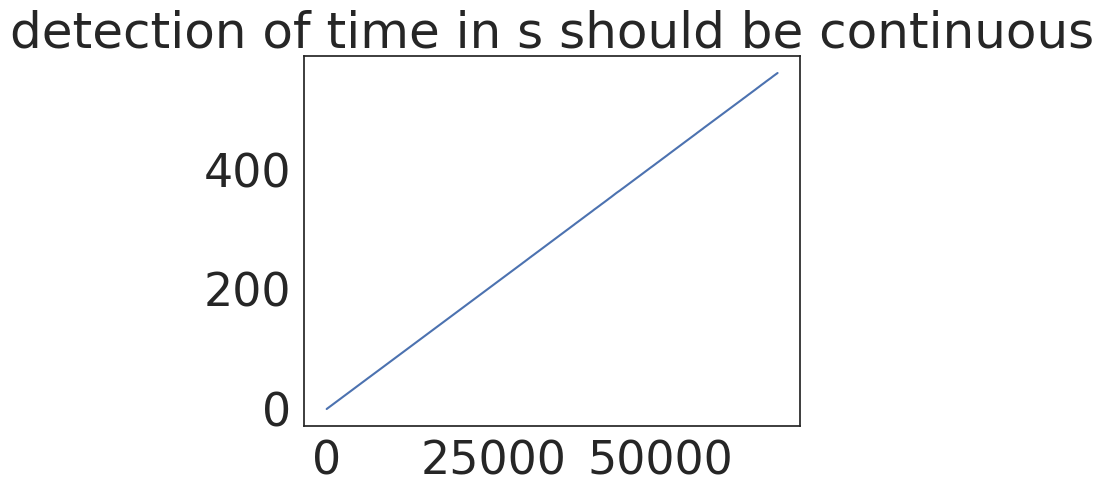

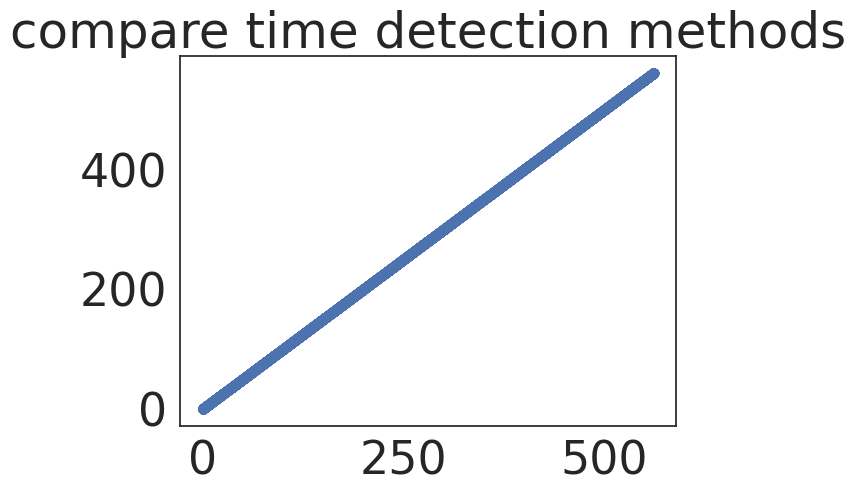

Starting file: date =  2023-05-23  time =  16 : 36 : 14.4617  framerate is 120.60999618101626
all should be equal  67648 67648 67648
3638 549525
STEP2: get movement details
bts= 65807 729 65837


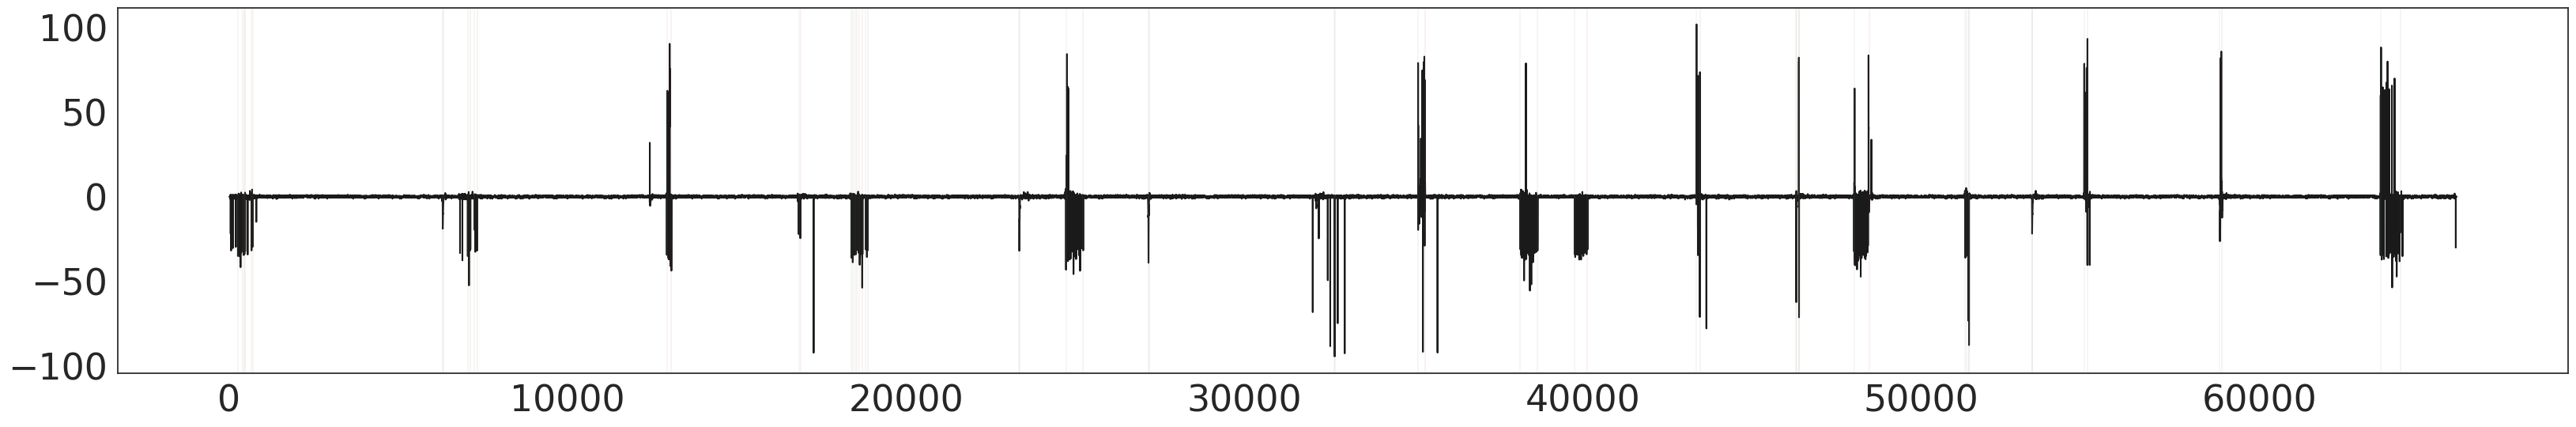

65837 65837
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230523_wk4_f2_-140_schooling/frames.bin'>
////////////
running subject #  DZ-230427_wk4_f1_schooling
////////////
STEP1: load data and plot
67468


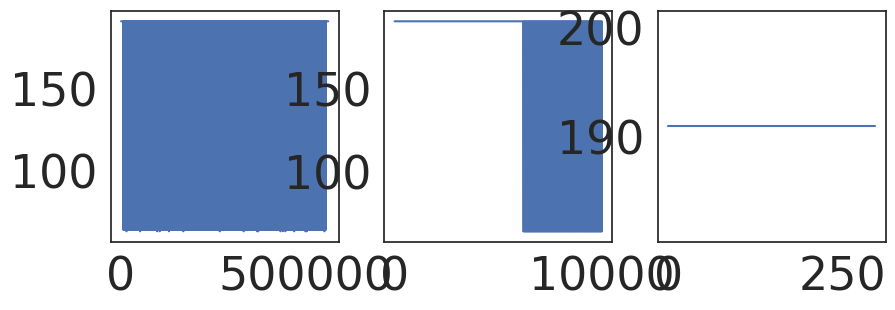

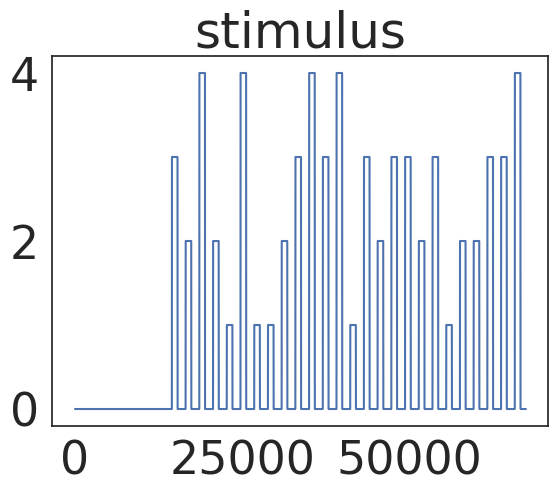

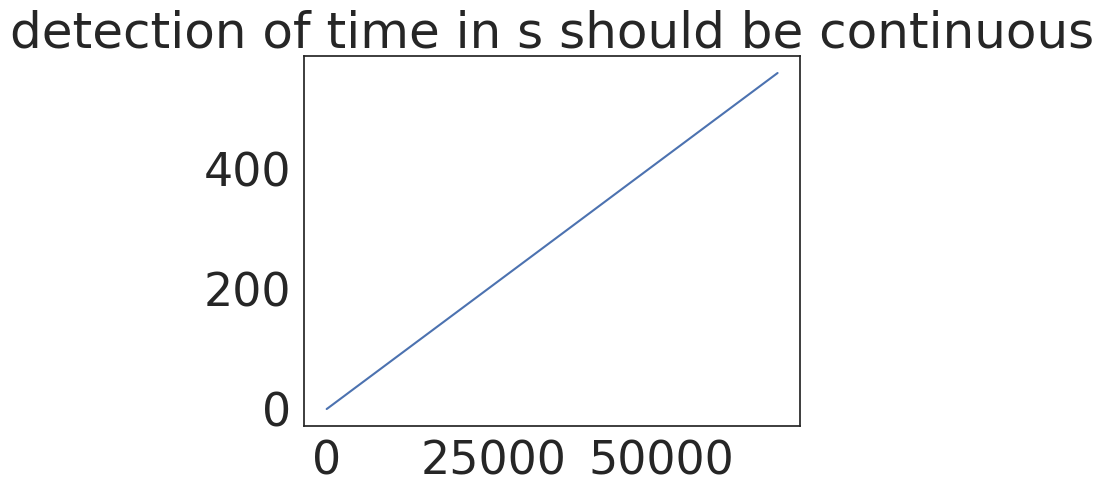

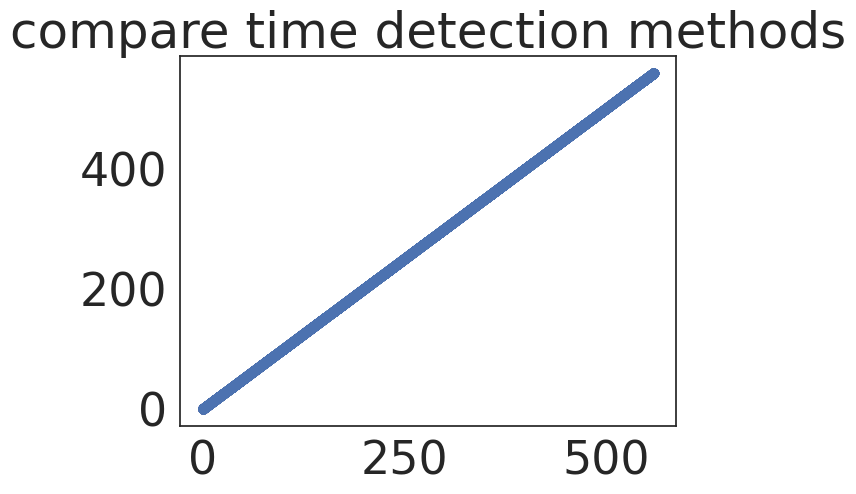

Starting file: date =  2023-04-27  time =  9 : 55 : 0.7997  framerate is 120.73841775191981
all should be equal  67468 67468 67468
6200 552095
STEP2: get movement details
bts= 47723 274 65908


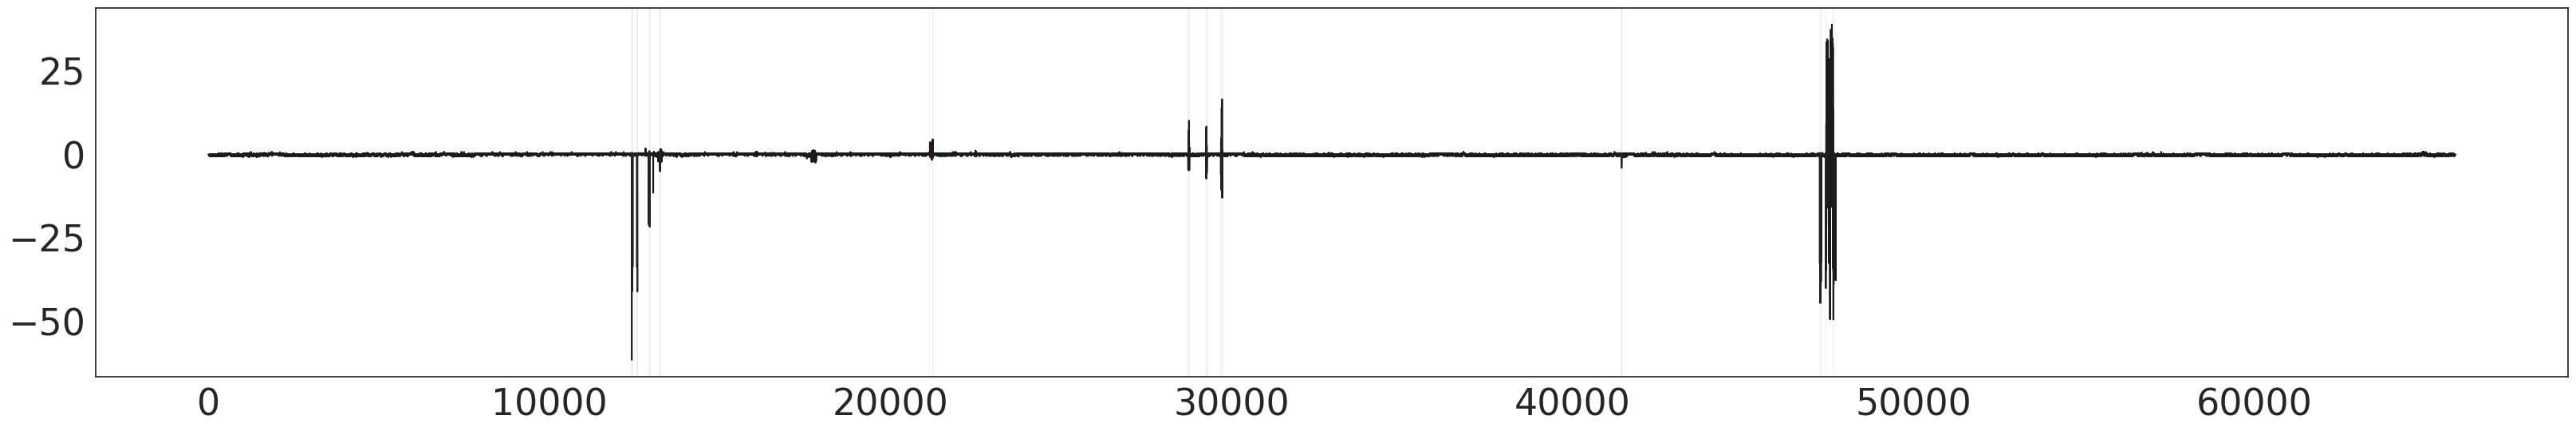

65908 65908
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230427_wk4_f1_schooling/frames.bin'>
////////////
running subject #  DZ-230522-f2-120_4wk_schooling
////////////
STEP1: load data and plot
68310


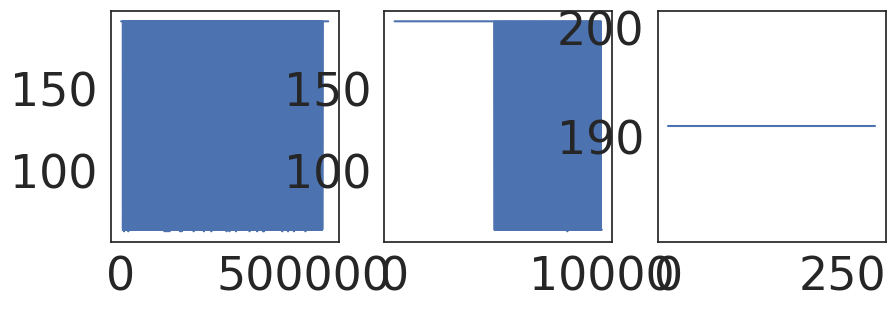

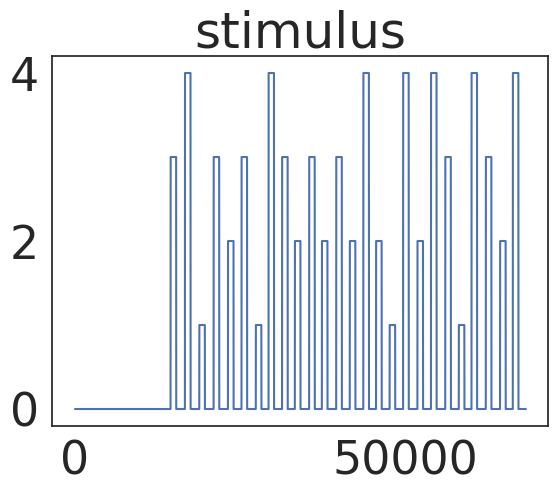

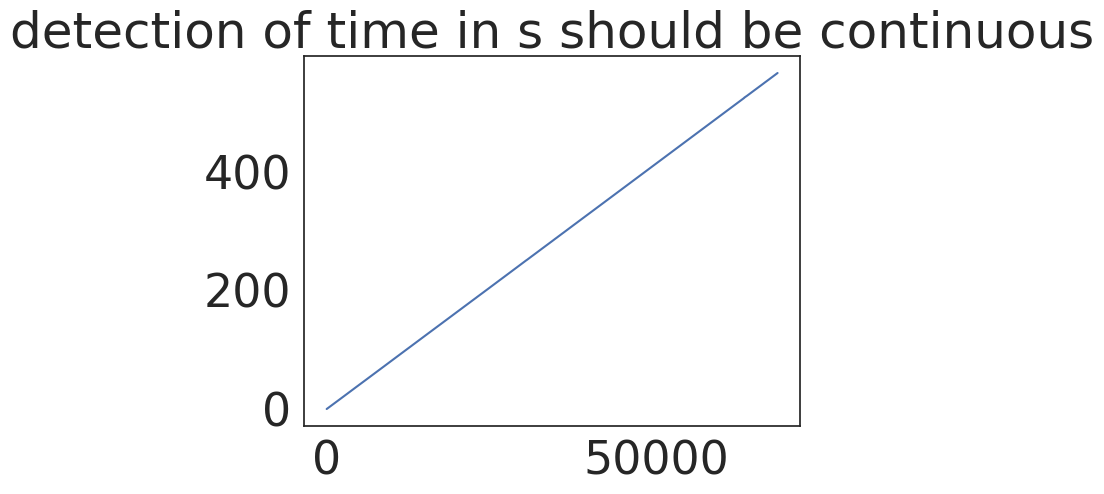

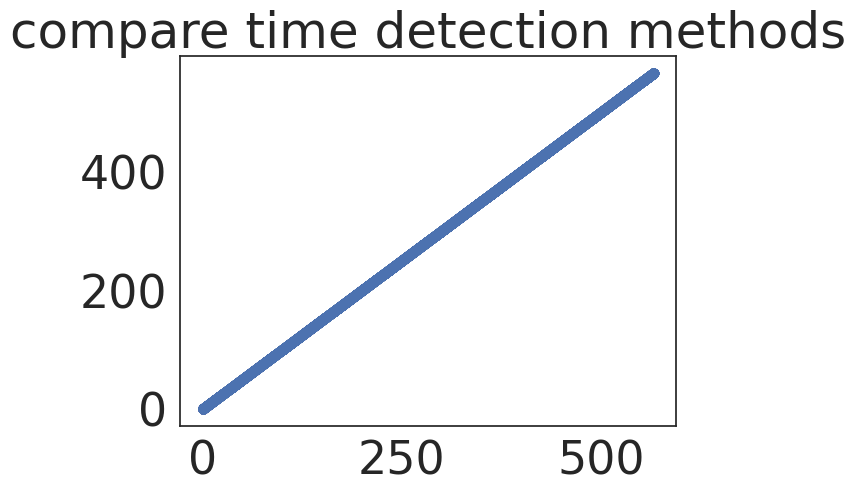

Starting file: date =  2023-05-22  time =  15 : 41 : 31.8636  framerate is 120.59661693917145
all should be equal  68310 68310 68310
4806 550685
STEP2: get movement details
bts= 65803 1532 65834


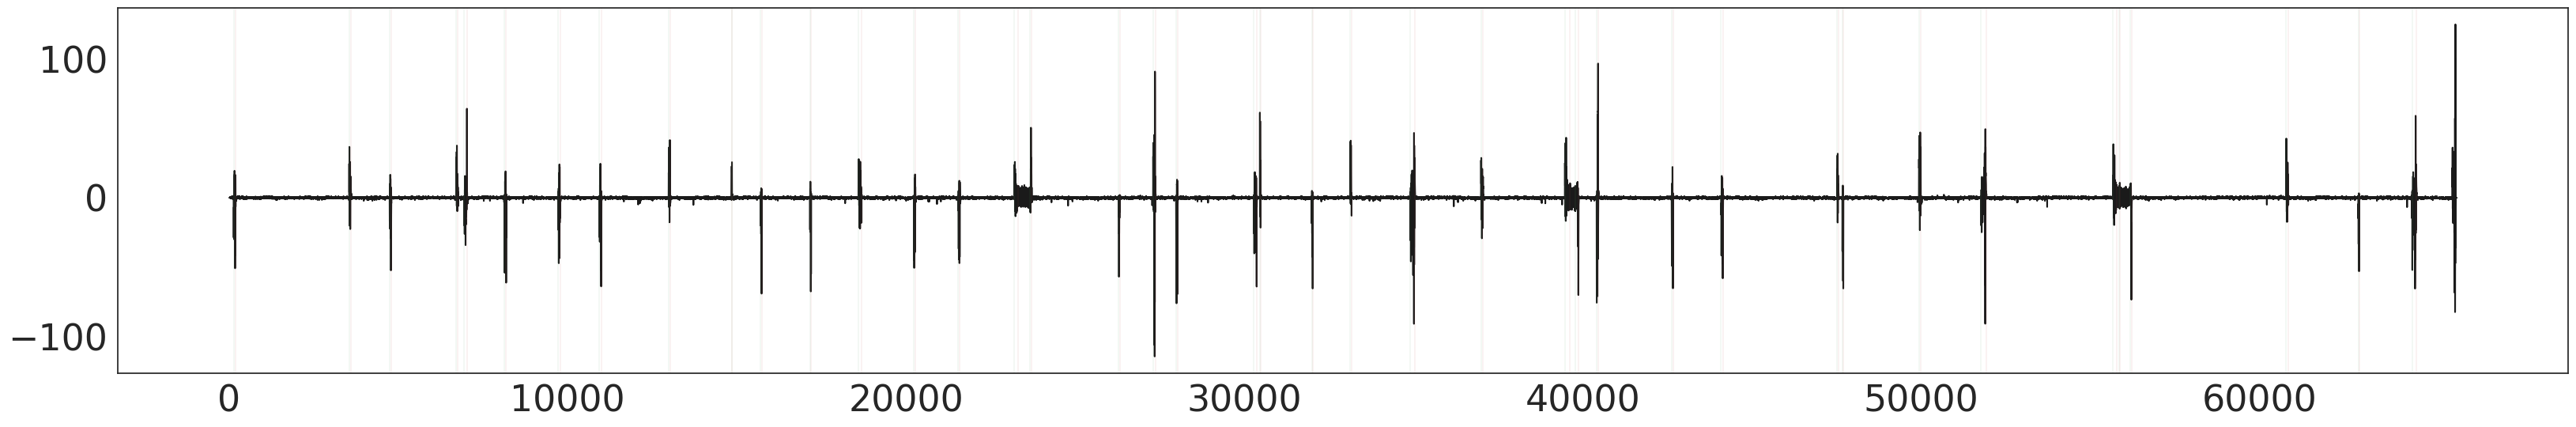

65834 65834
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230522-f2-120_4wk_schooling/frames.bin'>
////////////
running subject #  DZ-230523_wk4_f1_-110_schooling
////////////
STEP1: load data and plot
66917


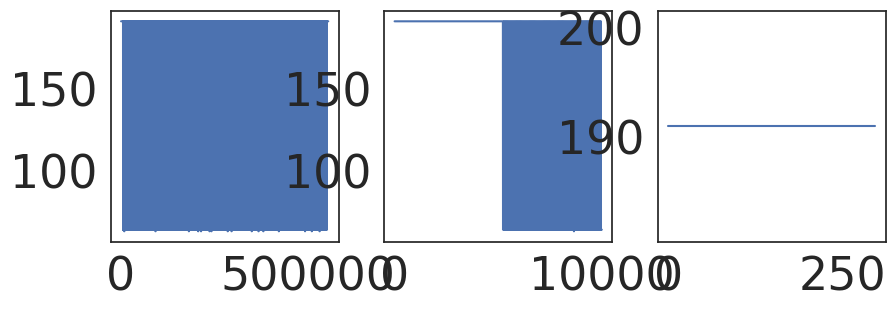

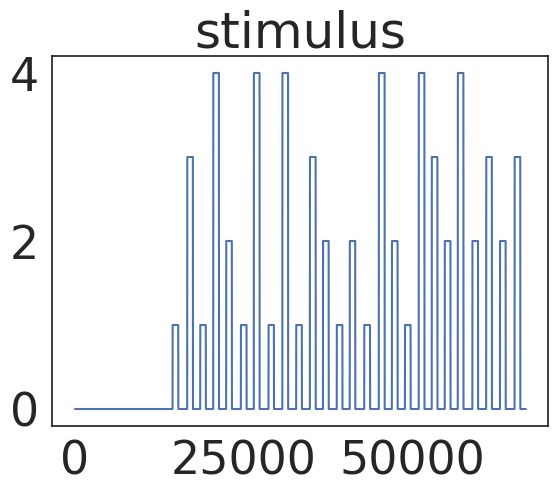

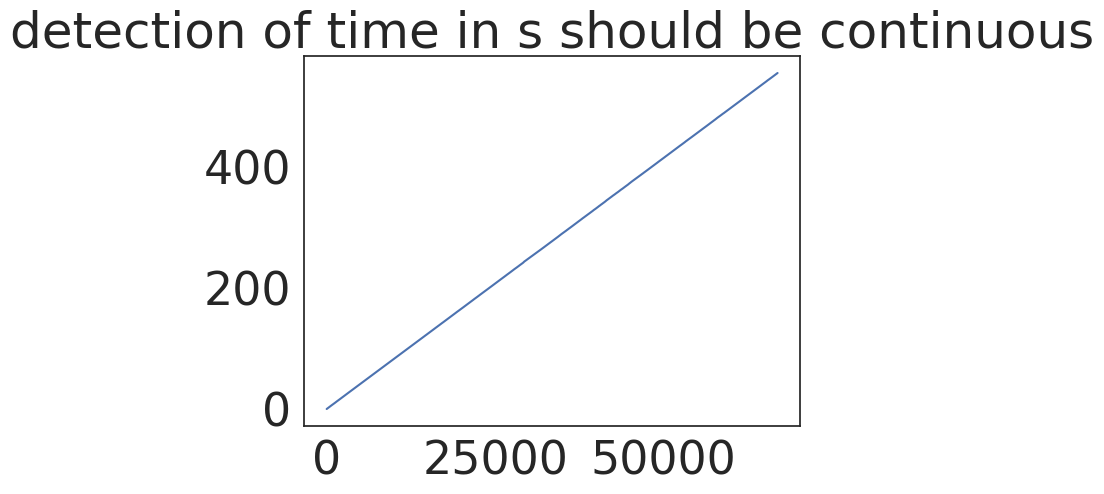

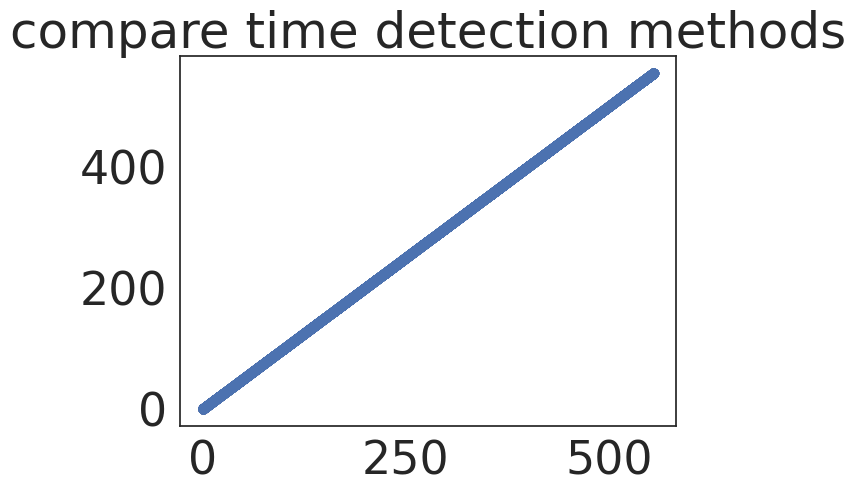

Starting file: date =  2023-05-23  time =  11 : 29 : 35.4998  framerate is 120.579274967488
all should be equal  66917 66917 66917
5227 551108
STEP2: get movement details
bts= 64889 939 65840


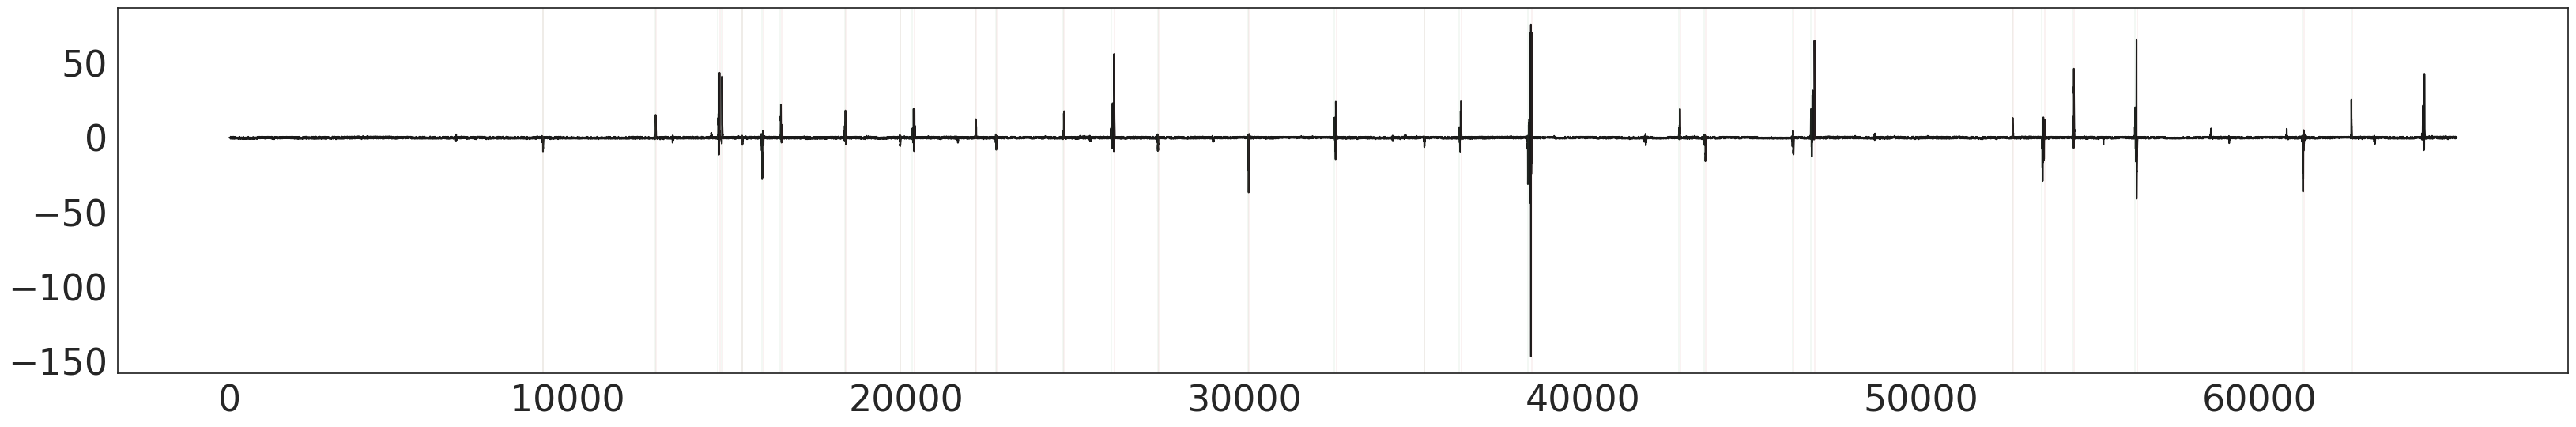

65840 65840
done processing  <_io.BufferedReader name='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/DZ-230523_wk4_f1_-110_schooling/frames.bin'>
////////////
running subject #  DZ-230523_wk4_f4_-90_schooling
////////////
STEP1: load data and plot
66468


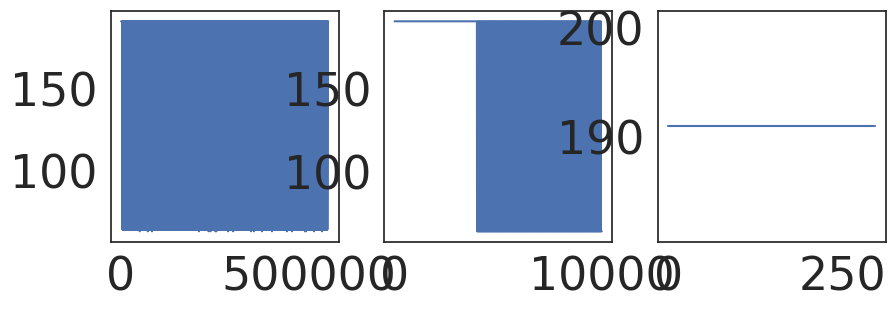

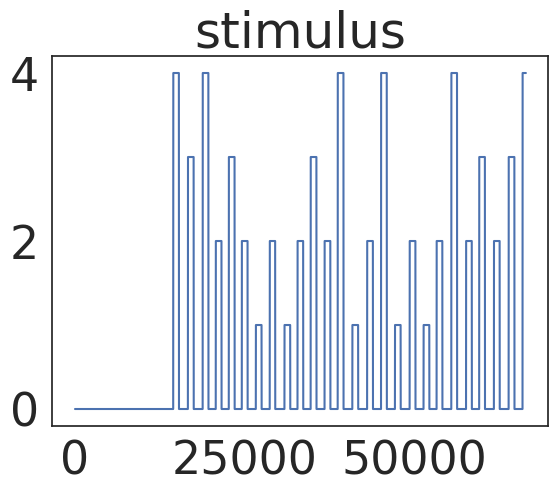

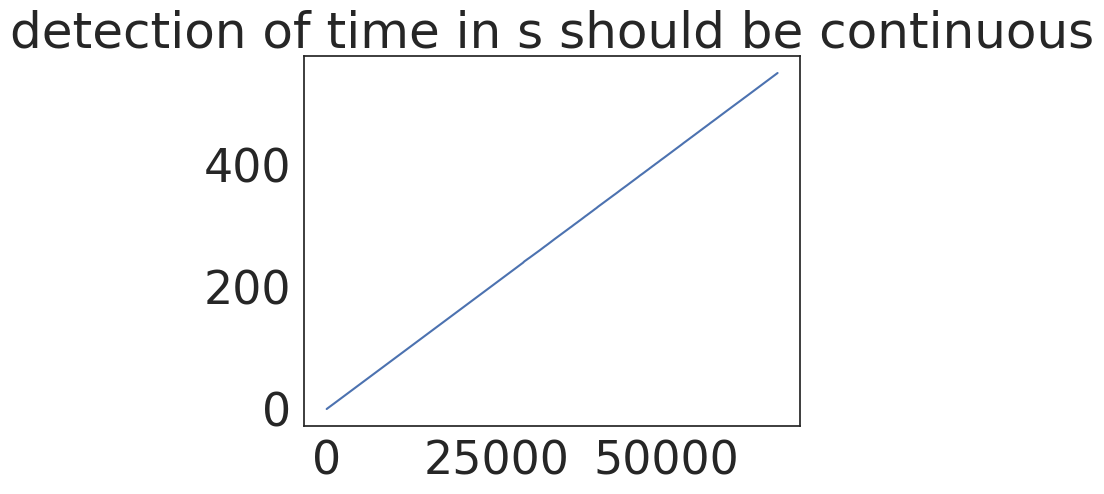

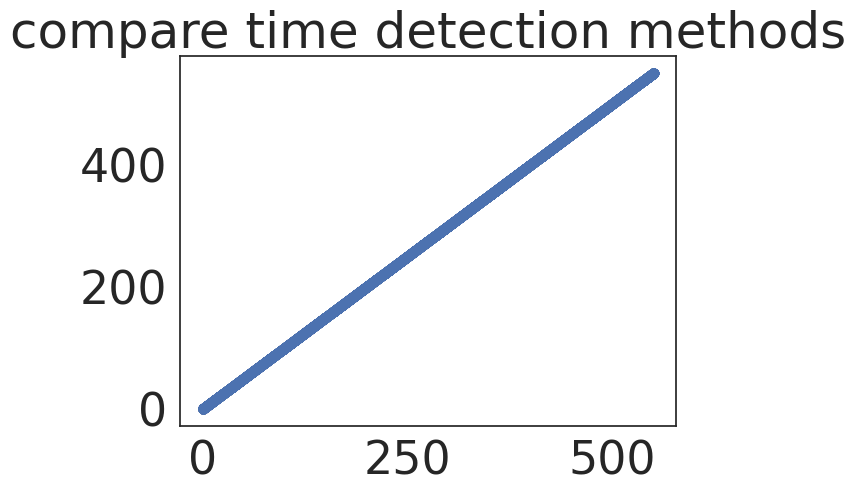

Starting file: date =  2023-05-23  time =  17 : 39 : 49.2088  framerate is 120.59084944268392
all should be equal  66468 66468 66468
3974 549851


KeyboardInterrupt: 

In [ ]:
#process behavioral data across fish (crop to only record during 2p imaging)

wk2_subjects = [
'DZ-230518_wk2_f1_z-130_schooling',
'DZ-230605-f3-100_2wk_schooling',
'DZ-230605-f5-90_2wk_schooling',
'ml-230427-f4_schooling-3',
'DZ-230517_wk2_f2-2_schooling',
'DZ-230518_wk2_f2-170_schooling']

wk4_subjects=[
'DZ-230503_wk4_f1_schooling',
'DZ-230519_wk4_f1-2_schooling',
'DZ-230523_wk4_f2_-140_schooling',
'DZ-230427_wk4_f1_schooling',
'DZ-230522-f2-120_4wk_schooling',
'DZ-230523_wk4_f1_-110_schooling',
'DZ-230523_wk4_f4_-90_schooling']

wk6_subjects=[
'DZ-230522_wk6_f3_schooling',
'DZ-230522_wk6_f2_schooling',
'DZ-230521_wk6_f4_schooling',
'DZ-230529_wk6_f1_-160_schooling',
'DZ-230524_wk6_f1-3_schooling',
'DZ-230503_wk6_f1_schooling',
'DZ-230525-f1-130_6wk_schooling',
'DZ-230521_wk6_f2-140_schooling']

subjects = wk2_subjects+wk4_subjects+wk6_subjects


for f in subjects:

    print("////////////")
    print("running subject # ", f)
    print("////////////")

    print("STEP1: load data and plot")
    #//////////////////////////////////////////////////////

    behav_path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

    tail_angle = np.array(pd.read_csv(behav_path+'tail_angle.csv', sep=',',header=0)).T
    time_bonsai = np.array(pd.read_csv(behav_path+'time.csv', sep=',',header=0)).T
    stimulus = np.array(pd.read_csv(behav_path+'stimulus_timing.csv', sep=',',header=0)).T[0]


    print(np.size(stimulus))
    f=open(behav_path+'frames.bin',"rb")
    num=list(f.read())
    frt = pd.read_csv(behav_path+'frametimes.csv', sep=';',header=0)
    num2=np.reshape(num, (int(len(num)/8),8))
    scope=num2.T[7]
    scopetimes=np.array(frt)

    plt.figure(figsize=[10,3])
    plt.subplot(1,3,1)
    plt.plot(scope)
    plt.subplot(1,3,2)
    plt.plot(scope[0:10000])
    plt.subplot(1,3,3)
    plt.plot(scope[-300:-1])
    plt.show()

    plt.plot(stimulus)
    plt.title('stimulus')
    plt.show()

    angle_a=tail_angle[0]
    time_a=tail_angle[1]

    date = str(time_a[0][0:10])
    start_h = int(time_a[0][11:13])
    start_m = int(time_a[0][14:16])
    start_s = float(time_a[0][17:24])
    start_time = start_h*3600+start_m*60+start_s

    #make timestamp for each angle, in seconds, from beginning of trial
    time_s = [(float(i[11:13])*3600 + float(i[14:16])*60 + float(i[17:24]))-start_time for i in time_a]
    fps=len(time_s)/max(time_s)

    plt.plot(time_s)
    plt.title('detection of time in s should be continuous')
    plt.show()

    plt.scatter(time_s, time_bonsai)
    plt.title('compare time detection methods')
    plt.show()

    print("Starting file: date = ",date, " time = ", start_h,":",start_m,":",start_s," framerate is",fps)
    print("all should be equal ", len(time_s), len(angle_a), len(time_a))

    #trim to 2p imaging times

    HM = np.char.find(scopetimes[0][0], ":") #find the first colon (between hour and minute)
    sdate = str(scopetimes[0][0][HM-9:HM-2])
    sstart_h = int(scopetimes[0][0][HM-2:HM])
    sstart_m = int(scopetimes[0][0][HM+1:HM+3])
    sstart_s = float(scopetimes[0][0][HM+4:HM+10])
    sstart_time = sstart_h*3600+sstart_m*60+sstart_s

    #make timestamp for each analog input, in seconds, from beginning of trial
    stime_s = [(float(i[0][-22:-20])*3600 + float(i[0][-19:-17])*60 + float(i[0][-16:-9]))-sstart_time for i in scopetimes]

    scan_on = [ndx for ndx,i in enumerate(scope) if i <70 and i >50]
    print(scan_on[0], scan_on[-1])

    start_2p = find_nearest(time_s, stime_s[scan_on[0]])
    stop_2p = find_nearest(time_s, stime_s[scan_on[-1]])

    angle_a = angle_a[start_2p:stop_2p]
    stimulus = stimulus[start_2p:stop_2p]
    time_sec = time_s[start_2p:stop_2p]


    #baseline subtract angle
    angle_a = baseline_subtraction(angle_a, int(fps/2)) #subtract sliding window of median in 500ms
    angle=angle_a.copy()


    print("STEP2: get movement details")
    #//////////////////////////////////////////////////////

    #movement details to save
    bout_start=[]; bout_end=[]; bout_max=[]; bout_dur=[]; bout_mean=[];
    frwd_long=[]; frwd_short=[]; turn_left=[]; turn_right=[]; other=[];

    #make list of all timepoints where tail angle is > 2 standard deviations above the mean
    thresh = np.mean(angle) + np.std(angle)*2
    bts = [ndx for ndx,i in enumerate(angle) if abs(i) > thresh]

    print("bts=", bts[-1], len(bts), len(angle))

    #identify the start and end of movement episodes
    tmp_bout_start=[]; tmp_bout_end=[];
    prev_start=0; prev_end=0; state=0;
    for ndx,x in enumerate(bts):
        if ndx<len(bts)-1: #if not the last index in bts
            if x>prev_end+fps*0.5 and state==0: #if ~500ms from last offset and current movement state is 0
                if bts[ndx+1]-x<fps*0.5: #if there is at least 1 movement 500ms from now
                    tmp_bout_start.append(x) #assign this timepoint to be a bout start
                    prev_start=x
                    state=1
            if state==1: # the current movement state is 1
                if bts[ndx+1]-prev_start>=fps*0.5: #if the NEXT timepoint is >= 500ms from now
                    tmp_bout_end.append(x) #assign this timepoint to be the bout end
                    prev_end=x
                    state=0
                elif x-prev_start<fps*0.5: #otherwise, if the last movement was within 500ms
                    prev_start=x #set this as the most recent move time to move the sequence forward


    #if last bout didn't end before recording ended, or bout<25ms or >20s: delete
    if len(tmp_bout_end)<len(tmp_bout_start):
        tmp_bout_start=tmp_bout_start[0:len(tmp_bout_end)]
    for i,j in zip(tmp_bout_start, tmp_bout_end):
        if j-i>fps*0.025 and j-i<fps*10 and j<len(angle):
            bout_start.append(i)
            bout_end.append(j)

    plt.figure(figsize=[40,6])
    plt.plot(angle, color='k')
    for i,j in zip(bout_start, bout_end):
        clip = angle[i:j]
        bout_max.append(max([abs(x) for x in clip]))
        bout_mean.append(np.mean(clip))
        bout_dur.append(time_s[j]-time_s[i])
        plt.axvline(i, color='g', linewidth=0.2, alpha=0.5)
        plt.axvline(j, color='r', linewidth=0.2, alpha=0.5)
    plt.show()

    colorz = []
    for ndx,(_dur,_mean,_max) in enumerate(zip(bout_dur, bout_mean, bout_max)):
        if _dur>=1.5 and _max<15:
            frwd_long.append(ndx)
            colorz.append('k')
        elif _dur<1.5 and _max<15:
            frwd_short.append(ndx)
            colorz.append('g')
        elif _max>=15 and _mean>0:
            turn_right.append(ndx)
            colorz.append('b')
        elif _max>=15 and _mean<0:
            turn_left.append(ndx)
            colorz.append('r')
        else:
            other.append(ndx)
            colorz.append('y')
    """
    #plot movement types
    fig = plt.figure(figsize=[8,8])
    ax = Axes3D(fig)
    ax.scatter(bout_mean, bout_dur, bout_max,  c=colorz, s=3, alpha=0.8)
    ax.set_xlabel('mean')
    ax.set_ylabel('abs(max)')
    ax.set_zlabel('duration')
    plt.title('movement types: turns are green and red')
    plt.show()
    """
    frwd_long_array = np.zeros(len(angle))
    frwd_short_array = np.zeros(len(angle))
    turn_left_array = np.zeros(len(angle))
    turn_right_array = np.zeros(len(angle))
    any_turn_array = np.zeros(len(angle))
    all_array = np.zeros(len(angle))
    any_frwd_array = np.zeros(len(angle))

    for ndx,(i,j) in enumerate(zip(bout_start, bout_end)):
        all_array[i:j]=1
        if ndx in frwd_long:
            frwd_long_array[i:j]=1
            any_frwd_array[i:j]=1
        if ndx in frwd_short:
            frwd_short_array[i:j]=1
            any_frwd_array[i:j]=1
        if ndx in turn_left:
            turn_left_array[i:j]=1
            any_turn_array[i:j]=1
        if ndx in turn_right:
            turn_right_array[i:j]=1
            any_turn_array[i:j]=1


    #bin behavior & plot over time
    idx = [x for x,j in enumerate(frwd_short_array)]
    print(len(idx), len(frwd_short_array))
    F = scipy.stats.binned_statistic(idx,any_frwd_array, statistic='sum', bins=int(len(angle)/fps))[0]
    T = scipy.stats.binned_statistic(idx,any_turn_array, statistic='sum', bins=int(len(angle)/fps))[0]


    #Save details of each fish
    np.savez(behav_path+'movement_stats.npz', \
        angle=angle, stim=stimulus, time_sec=time_sec,\
        bout_start=bout_start, bout_end=bout_end, bout_max=bout_max, bout_dur=bout_dur, bout_mean=bout_mean,\
        frwd_long_array=frwd_long_array, frwd_short_array=frwd_short_array, \
        turn_left_array=turn_left_array,turn_right_array=turn_right_array, any_turn_array=any_turn_array, \
        any_frwd_array=any_frwd_array, all_array=all_array)

    print('done processing ', str(f))

F-statistic:  4.526224150525969 P-value:  0.025561913695693456
          1         2         3
1  1.000000  0.269532  0.069864
2  0.269532  1.000000  1.000000
3  0.069864  1.000000  1.000000
F-statistic:  1.4747054933851926 P-value:  0.2552149989353186
F-statistic:  0.9459522546633561 P-value:  0.40678530356171383
F-statistic:  1.6856311723462247 P-value:  0.21329514286830584
F-statistic:  0.24593616128825976 P-value:  0.7845571240098356


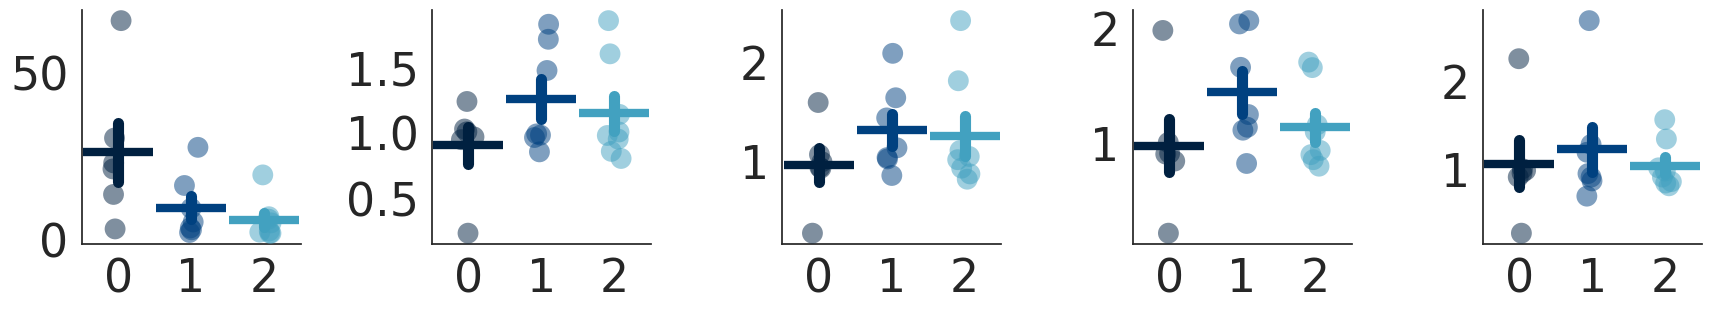

'\nplt.figure(figsize=[10,4])\nplt.subplot(131)\nsns.stripplot(data = [w2S1,w2S2,w2S3,w2S4], palette=\'gray\', size=6, alpha=0.6)\nsns.pointplot(data = [w2S1,w2S2,w2S3,w2S4],estimator=\'mean\',errorbar=\'se\',scale=1.5,palette=\'gray\',join=False)\nplt.title(\'wk2\')\nplt.axhline(1.0, color=\'0.5\')\nplt.ylim(0.5,2.0)\n\n# one-way ANOVA\nf_statistic, p_value = stats.f_oneway(w2S1,w2S2,w2S3,w2S4)\nprint("F-statistic: ", f_statistic, "P-value: ", p_value)\n\nif p_value < 0.05:\n    posthoc = sp.posthoc_ttest([w2S1,w2S2,w2S3,w2S4], val_col=\'value\', group_col=\'group\', p_adjust=\'bonferroni\')\n    print(posthoc)\n\n\nplt.subplot(132)\nsns.stripplot(data = [w4S1,w4S2,w4S3,w4S4], palette=\'gray\', size=6, alpha=0.6)\nsns.pointplot(data = [w4S1,w4S2,w4S3,w4S4],estimator=\'mean\',errorbar=\'se\',scale=1.5,palette=\'gray\',join=False)\nplt.title(\'wk4\')\nplt.axhline(1.0, color=\'0.5\')\nplt.ylim(0.5,2.0)\n\n# one-way ANOVA\nf_statistic, p_value = stats.f_oneway(w4S1,w4S2,w4S3,w4S4)\nprint(

In [ ]:
from scipy.sparse import rand
#here, get behavioral response to different stimuli

wk2_subjects = [
'DZ-230518_wk2_f1_z-130_schooling',
'DZ-230605-f3-100_2wk_schooling',
'DZ-230605-f5-90_2wk_schooling',
'ml-230427-f4_schooling-3',
'DZ-230517_wk2_f2-2_schooling',
'DZ-230518_wk2_f2-170_schooling']

wk4_subjects=[
'DZ-230503_wk4_f1_schooling',
'DZ-230519_wk4_f1-2_schooling',
'DZ-230523_wk4_f2_-140_schooling',
'DZ-230427_wk4_f1_schooling',
'DZ-230522-f2-120_4wk_schooling',
'DZ-230523_wk4_f1_-110_schooling',
'DZ-230523_wk4_f4_-90_schooling']

wk6_subjects=[
'DZ-230522_wk6_f3_schooling',
'DZ-230522_wk6_f2_schooling',
'DZ-230521_wk6_f4_schooling',
'DZ-230529_wk6_f1_-160_schooling',
'DZ-230524_wk6_f1-3_schooling',
'DZ-230503_wk6_f1_schooling',
'DZ-230525-f1-130_6wk_schooling',
'DZ-230521_wk6_f2-140_schooling']

subjects = wk2_subjects+wk4_subjects+wk6_subjects

w2S1=[]; w2S2=[]; w2S3=[]; w2S4=[]; w2baseline=[];
w4S1=[]; w4S2=[]; w4S3=[]; w4S4=[]; w4baseline=[];
w6S1=[]; w6S2=[]; w6S3=[]; w6S4=[]; w6baseline=[];


for f in subjects:

    path ='/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

    load=np.load(path+'movement_stats.npz', allow_pickle=True)
    tmp=load['time_sec']
    time=[i-tmp[0] for i in tmp]
    tail_angle=load['angle']
    turn_array=load['any_turn_array']
    all_mov=load['all_array']
    stimulus=load['stim']

    S0=np.zeros(len(stimulus));
    S1=np.zeros(len(stimulus));
    S2=np.zeros(len(stimulus));
    S3=np.zeros(len(stimulus));
    S4=np.zeros(len(stimulus));

    for ndx,i in enumerate(stimulus):
      if i==0:
        S0[ndx]=1
      if i==1:
        S1[ndx]=1
      if i==2:
        S2[ndx]=1
      if i==3:
        S3[ndx]=1
      if i==4:
        S4[ndx]=1

    post_stim_dur= 12*121   #post-stimulus duration (s)
    pre_stim_dur= 5*121

    #Stim ON
    S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and ndx < len(S1)-post_stim_dur]#[:2]
    S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and ndx < len(S2)-post_stim_dur]#[:2]
    S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and ndx < len(S3)-post_stim_dur]#[:2]
    S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and ndx < len(S4)-post_stim_dur]#[:2]

    #all_mov=turn_array

    if f in wk2_subjects:
      for SX,summ, in zip([S1_ON, S2_ON, S3_ON, S4_ON], [w2S1,w2S2,w2S3,w2S4]):
        summ.append(np.mean([sum(abs(tail_angle[ndx:ndx+post_stim_dur]))/(sum(abs(tail_angle[0:post_stim_dur*5]))/5.0) for ndx in SX]))
      w2baseline.append((sum(abs(tail_angle[0:post_stim_dur*5]))/5.0)/121.0)
    if f in wk4_subjects:
      for SX,summ, in zip([S1_ON, S2_ON, S3_ON, S4_ON], [w4S1,w4S2,w4S3,w4S4]):
        summ.append(np.mean([sum(abs(tail_angle[ndx:ndx+post_stim_dur]))/(sum(abs(tail_angle[0:post_stim_dur*5]))/5.0) for ndx in SX]))
      w4baseline.append((sum(abs(tail_angle[0:post_stim_dur*5]))/5.0)/121.0)
    if f in wk6_subjects:
      for SX,summ, in zip([S1_ON, S2_ON, S3_ON, S4_ON], [w6S1,w6S2,w6S3,w6S4]):
        summ.append(np.mean([sum(abs(tail_angle[ndx:ndx+post_stim_dur]))/(sum(abs(tail_angle[0:post_stim_dur*5]))/5.0) for ndx in SX]))
      w6baseline.append((sum(abs(tail_angle[0:post_stim_dur*5]))/5.0)/121.0)


plt.figure(figsize=[18,4])
plt.subplot(151)
sns.pointplot(data=[w2baseline,w4baseline,w6baseline], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=[w2baseline,w4baseline,w6baseline], s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.title('baseline - degs/s')

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(w2baseline,w4baseline,w6baseline)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest([w2baseline,w4baseline,w6baseline], val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.subplot(152)
sns.pointplot(data=[w2S1,w4S1,w6S1], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=[w2S1,w4S1,w6S1], s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.title('horizontal')
#plt.axhline(1.0, color='0.5')
#plt.ylim(-0.5,3.5)

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(w2S1,w4S1,w6S1)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest([w2S1,w4S1,w6S1], val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.subplot(153)
sns.pointplot(data=[w2S2,w4S2,w6S2], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=[w2S2,w4S2,w6S2], s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.title('vertical')
#plt.axhline(1.0, color='0.5')
#plt.ylim(-0.5,3.5)

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(w2S2,w4S2,w6S2)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest([w2S2,w4S2,w6S2], val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)


plt.subplot(154)
sns.pointplot(data=[w2S3,w4S3,w6S3], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=[w2S3,w4S3,w6S3], s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.title('circle')
#plt.axhline(1.0, color='0.5')
#plt.ylim(-0.5,3.5)

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(w2S3,w4S3,w6S3)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest([w2S3,w4S3,w6S3], val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

plt.subplot(155)
sns.pointplot(data=[w2S4,w4S4,w6S4], estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
sns.stripplot(data=[w2S4,w4S4,w6S4], s=15, palette='ocean', jitter=True, alpha=0.5)
#plt.title('drift')
#plt.axhline(1.0, color='0.5')
#plt.ylim(-0.5,3.5)

# one-way ANOVA
f_statistic, p_value = stats.f_oneway(w2S4,w4S4,w6S4)
print("F-statistic: ", f_statistic, "P-value: ", p_value)

if p_value < 0.05:
    posthoc = sp.posthoc_ttest([w2S4,w4S4,w6S4], val_col='value', group_col='group', p_adjust='bonferroni')
    print(posthoc)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.6)
sns.despine()
#plt.savefig(figure_savepath +"Basic_processing/behavioral_responses.pdf", transparent=True)
plt.show()



In [ ]:
#Load 2p imaging data for each fish, filter by brain region, and plot

from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans, AgglomerativeClustering

"""
#Suite2p Output Files
F.npy: array of fluorescence traces (ROIs by timepoints)
Fneu.npy: array of neuropil fluorescence traces (ROIs by timepoints)
spks.npy: array of deconvolved traces (ROIs by timepoints)
stat.npy: array of statistics computed for each cell (ROIs by 1)
ops.npy: options and intermediate outputs
iscell.npy: specifies whether an ROI is a cell, first column is 0/1, and second column is probability that the ROI is a cell based on the default classifier
"""

wk2_subjects = [
'DZ-230518_wk2_f1_z-130_schooling',
'DZ-230605-f3-100_2wk_schooling',
'ml-230427-f4_schooling-3',
'DZ-230517_wk2_f2-2_schooling',
]

wk4_subjects=[
'DZ-230503_wk4_f1_schooling',
'DZ-230519_wk4_f1-2_schooling',
'DZ-230523_wk4_f2_-140_schooling',
'DZ-230427_wk4_f1_schooling',
]

wk6_subjects=[
'DZ-230522_wk6_f3_schooling',
'DZ-230522_wk6_f2_schooling',
'DZ-230521_wk6_f4_schooling',
'DZ-230529_wk6_f1_-160_schooling',
]

subjects = wk2_subjects+wk4_subjects+wk6_subjects


brain_regions = ['dorsal_forebrain', 'ventral_forebrain', 'habenula','thalamus',\
                 'left_tectum_neuropil', 'left_tectum_cell-layer',\
                 'right_tectum_neuropil', 'right_tectum_cell-layer',\
                 'cerebellum', 'hindbrain']

brain_region_groupings = [['telencephalon', 'dorsal_forebrain', 'ventral_forebrain'],\
                          ['dienencephalon', 'habenula','thalamus'],\
                          ['mesencephalon', 'left_tectum_neuropil', 'left_tectum_cell-layer','right_tectum_neuropil', 'right_tectum_cell-layer'],\
                          ['rhombencephalon', 'cerebellum', 'hindbrain']]

#col=['tomato', 'deepskyblue','chocolate', 'seagreen', 'mediumpurple', 'palegreen', 'orange','turquoise', 'gold','palevioletred']

col=['peru','moccasin', 'darkgoldenrod','khaki']


resample_Hz = 10
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

for f in subjects:

    path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'
    load=np.load(path+'movement_stats.npz', allow_pickle=True)
    tmp=load['time_sec']
    time=[i-tmp[0] for i in tmp]
    new_time_base = int(max(time)*resample_Hz)
    ang=resized(load['angle'],new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
    stimulus=load['stim']


    neuron_traces=[]
    neuron_traces_original=[]
    neuron_coordinates=[]
    neuron_anatomy=[]
    neuron_color=[]

    fluor=np.load(path+"suite2p/plane0/F.npy",allow_pickle=True)
    iscell=np.load(path+"suite2p/plane0/iscell.npy",allow_pickle=True)
    stat=np.load(path+"suite2p/plane0/stat.npy",allow_pickle=True)
    output_ops =np.load(path+"suite2p/plane0/ops.npy", allow_pickle=True).item()

    load=np.load(path+'anatomy_selections.npz')
    neuron_locations=load['neuron_locations']

    for fluor,i,s,loc in zip(fluor,iscell,stat,neuron_locations):
        #if np.isfinite(fluor).all()==True:
        if i[0]==1 and np.isfinite(fluor).all()==True:
            if max(abs(scipy.stats.zscore(fluor)))>1.5:
              if loc != 'none':
                #timeseries for display here
                tmp = resized(fluor,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
                tmp2 = scipy.signal.detrend(tmp) #detrend
                kernel_size = int(1.0*resample_Hz) #1s
                kernel = np.ones(kernel_size) / kernel_size
                tmp3 = np.convolve(tmp2, kernel, mode='same') #smooth

                if math.isnan(tmp3[0])==False:
                  neuron_traces.append(scipy.stats.zscore(tmp3)) #append zscore
                  # timeseries for saving
                  neuron_traces_original.append(fluor)

                  neuron_coordinates.append([int(np.median(s['xpix'])),int(np.median(s['ypix']))])
                  neuron_anatomy.append(loc)
                  for indx,region in enumerate(brain_region_groupings):
                    if loc in region:
                      neuron_color.append(col[indx])

    """
    ##save traces and coordinates for z-brain registration (in "Registration_brains-to-atlas.ipynb")
    np.savez(path+'neuron_details_with-anatomy.npz', neuron_coordinates=neuron_coordinates, \
             neuron_traces=neuron_traces_original, neuron_anatomy=neuron_anatomy)


    neuron_max = [max(tr) for tr in neuron_traces]
    neurons_to_plot = [tr for tr in neuron_traces if np.percentile(neuron_max, 98)> max(tr) > np.percentile(neuron_max, 93)]

    plt.figure(figsize=[5,int(len(neurons_to_plot)/5)])
    for ndx,i in enumerate(neurons_to_plot):
      ff=i[1000:2800]
      plt.plot(ff+(ndx*5), color = 'k', alpha=0.6)
    plt.title('some cells')
    plt.xlabel('3 mins')
    plt.tight_layout()
    plt.savefig(figure_savepath +"Basic_processing/neuron_example_traces_"+f+".pdf", transparent=True)
    plt.show()

    plt.figure(figsize=[5,5])
    plt.imshow(output_ops['meanImgE'], cmap='gray')
    plt.scatter([i[0] for i in neuron_coordinates], [i[1] for i in neuron_coordinates], s=10, color='crimson', alpha=0.8)
    plt.title("with cells")
    plt.tight_layout()
    plt.savefig(figure_savepath +"Basic_processing/neuron_locations_"+f+".pdf", transparent=True)
    plt.show()

    plt.figure(figsize=[5,5])
    plt.imshow(output_ops['meanImgE'], cmap='gray', alpha=0.7)
    plt.scatter([i[0] for i in neuron_coordinates], [i[1] for i in neuron_coordinates], s=12, color=neuron_color, alpha=0.9)
    plt.tight_layout()
    plt.savefig(figure_savepath +"Basic_processing/neuron_regions_"+f+".pdf", transparent=True)
    plt.show()
    """

    #S1 = "limegreen", S2 = "darkturquoise", S3 = "mediumpurple", S4 = "gold"
    if f in ['DZ-230518_wk2_f1_z-130_schooling', 'DZ-230523_wk4_f2_-140_schooling', 'DZ-230529_wk6_f1_-160_schooling']:

      s0=np.zeros(len(stimulus));
      s1=np.zeros(len(stimulus));
      s2=np.zeros(len(stimulus));
      s3=np.zeros(len(stimulus));
      s4=np.zeros(len(stimulus));
      for ndx,i in enumerate(stimulus):
        if i==0:
          s0[ndx]=1
        if i==1:
          s1[ndx]=1
        if i==2:
          s2[ndx]=1
        if i==3:
          s3[ndx]=1
        if i==4:
          s4[ndx]=1

      #resample all to common Hz, and crop to first X% of behavior
      S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
      S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

      max_order_index = len(brain_regions)
      order_index = {region: idx for idx, region in enumerate(brain_regions)}
      sorted_indices = sorted(range(len(neuron_traces)), key=lambda i: (order_index.get(neuron_anatomy[i], max_order_index), i))
      neurons_sorted = [neuron_traces[i] for i in sorted_indices]
      colors_sorted = [neuron_color[i] for i in sorted_indices]

      """
      plt.figure(figsize=[1,6])
      for ndx,c in enumerate(colors_sorted):
        plt.scatter(1,ndx, color=c, s=2)
      plt.tight_layout()
      plt.savefig(figure_savepath +"Basic_processing/anatomy-color-label_for_neuron_heatmap_"+f+".pdf", transparent=True)
      plt.show()

      plt.figure(figsize=[12,6])
      sns.heatmap(neurons_sorted, cmap="Greys", vmin=-1, vmax=4)
      plt.title('all_cells, zscored')
      plt.tight_layout()
      plt.savefig(figure_savepath +"Basic_processing/neuron_heatmap_"+f+".pdf", transparent=True, dpi=15)
      plt.show()

      plt.figure(figsize=[12,2])
      plt.plot(S1, color='limegreen', linewidth=3.0, alpha=0.6)
      plt.plot(S2, color='darkturquoise', linewidth=3.0, alpha=0.6)
      plt.plot(S3, color='mediumpurple', linewidth=3.0, alpha=0.6)
      plt.plot(S4, color='gold', linewidth=3.0, alpha=0.6)
      plt.plot(np.zeros(len(S4)), color='k', linewidth=5.0)
      plt.ylim(0,1.4)
      plt.title('stimulus')
      plt.tight_layout()
      plt.savefig(figure_savepath +"Basic_processing/neuron_matched-stimulus_"+f+".pdf", transparent=True)
      plt.show()

      plt.figure(figsize=[12,2])
      plt.plot(ang, color='k')
      plt.title('tail_angle')
      plt.tight_layout()
      plt.savefig(figure_savepath +"Basic_processing/neuron_matched-tail-angle_"+f+".pdf", transparent=True)
      plt.show()
      """

    print("number of cells, number of timepoints:  ", np.shape(neuron_traces))


NameError: ignored